<a href="https://colab.research.google.com/github/baschoff/Data-Science-Project/blob/main/Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration
## Team Information
  - Louis Jensen - ljesen1@angelo.edu

  - Brandon Aschoff - baschoff@angelo.edu

  Class 4330-010 Introduction to Data Science

## Datasets Used
  - Zillow: A dataset full of Zillow's "Zestimates" for houses, there approximation of house prices in each state measured monthly since January of 2000.
  - ComRealPri: Actual sell prices of real estate across the United States measured quarterly since January 2005
  - StickyPrice: A dataset containing the actual percentage of inflation gathered monthly since January 1968.
  - Inflation: An inflation index measured monthly since January 1947
  - PPI_Glass: Producer Price Index for glass starting measured monthly since December 2003
  - PPI_Lumber: Producer Price Index for lumber starting measured monthly since January 1926
  - PPI_Asphalt: Producer Price Index for Asphalt and Shingles, they are in the same dataset for some reason. measured monthly since December 1975
  - PPI_Cement: Producer Price Index for Cement and Concrete, these make sense in the same dataset, measured monthly since December 2003
  - PPI_Plumbing: Producer Price Index for Plumbing Materials, measured monthly since January 1947
  - PPI_Metals:  Producer Price Index for all metals measured monthly since December 2010

## Imports and Read in of Datasets

In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import linear_model
from functools import reduce
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

!git clone https://github.com/baschoff/Data-Science-Project.git

Zillow = pd.read_csv('/content/Data-Science-Project/Datasets/ZHVI.csv')
ComRealPri = pd.read_csv('/content/Data-Science-Project/Datasets/Commercial Real Estate.csv')
StickyPrice = pd.read_csv('/content/Data-Science-Project/Datasets/Sticky Price.csv')
Inflation = pd.read_csv('/content/Data-Science-Project/Datasets/US_inflation_rates.csv')
PPI_Glass = pd.read_csv('/content/Data-Science-Project/Datasets/PPI-Glass.csv')
PPI_Lumber = pd.read_csv('/content/Data-Science-Project/Datasets/PPI-Lumber.csv')
PPI_Asphalt = pd.read_csv('/content/Data-Science-Project/Datasets/PPI-Asphalt+Shingles.csv')
PPI_Cement = pd.read_csv('/content/Data-Science-Project/Datasets/PPI-Cement+Concrete.csv')
PPI_Plumbing = pd.read_csv('/content/Data-Science-Project/Datasets/PPI-Plumbing.csv')
PPI_Metals = pd.read_csv('/content/Data-Science-Project/Datasets/PPI-Metal.csv')

PPI_Glass.rename(columns = {"PCU3272132721": "Price"}, inplace = True)
PPI_Lumber.rename(columns = {"WPU08": "Price"}, inplace = True)
PPI_Asphalt.rename(columns = {"PCU324122324122": "Price"}, inplace = True)
PPI_Cement.rename(columns = {"PCU32733273": "Price"}, inplace = True)
PPI_Plumbing.rename(columns = {"PCU332913332913": "Price"}, inplace = True)
PPI_Metals.rename(columns = {"WPU10170502": "Price"}, inplace = True)
StickyPrice.rename(columns = {"CORESTICKM159SFRBATL" : "Value"}, inplace = True)
ComRealPri.rename(columns = {"COMREPUSQ159N" : "Value"}, inplace = True)
Zillow.rename(columns = {"Unnamed: 0": "Date"}, inplace = True)
Inflation.rename(columns = {"DATE": "Date"}, inplace = True)
Inflation.rename(columns = {"DFF": "Value"}, inplace = True)

cN = PPI_Glass.columns.tolist()
cN1 = PPI_Lumber.columns.tolist()
cN2 = PPI_Asphalt.columns.tolist()
cN3 = PPI_Cement.columns.tolist()
cN4 = PPI_Plumbing.columns.tolist()
cN5 = PPI_Metals.columns.tolist()
cN6 = Inflation.columns.tolist()
cN7 = StickyPrice.columns.tolist()
cN8 = ComRealPri.columns.tolist()
cN9 = Zillow.columns.tolist()

#print(PPI_Cement) #Debugging Print Statement

Cloning into 'Data-Science-Project'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 81 (delta 31), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (81/81), 23.34 MiB | 10.38 MiB/s, done.
Resolving deltas: 100% (31/31), done.


# (1) Numerical and Categorical Features - BA
Description of the Numerical and Categorical Features within the datasets

## Identify catagorical and numerical features
Our data consists of dates, prices, and states
### Categorical

The categorical data in our datasets consists of dates and states. All of our datasets have a date column. The Zillow dataset is the only dataset with a different piece categorical data, it contains one column for every state in the United States.

### Numerical
Our only piece of numerical data is the price. Every dataset has a date and the price of the item that datasets corresponds to at that date, or the increase of that price.

### Values and Ranges
In the code cell below I will display each datasets range of values except for Zillow, it will be dealt with a bit later.

In [2]:
PPI_Glass_min = PPI_Glass['Price'].min()
PPI_Glass_max = PPI_Glass['Price'].max()
PPI_Lumber_min = PPI_Lumber['Price'].min()
PPI_Lumber_max = PPI_Lumber['Price'].max()
PPI_Asphalt_min = PPI_Asphalt['Price'].min()
PPI_Asphalt_max = PPI_Asphalt['Price'].max()
PPI_Cement_min = PPI_Cement['Price'].min()
PPI_Cement_max = PPI_Cement['Price'].max()
PPI_Plumbing_min = PPI_Plumbing['Price'].min()
PPI_Plumbing_max = PPI_Plumbing['Price'].max()
PPI_Metals_min = PPI_Metals['Price'].min()
PPI_Metals_max = PPI_Metals['Price'].max()
StickyPrice_min = StickyPrice['Value'].min()
StickyPrice_max = StickyPrice['Value'].max()
ComRealPri_min = ComRealPri['Value'].min()
ComRealPri_max = ComRealPri['Value'].max()
Inflation_min = Inflation['value'].min()
Inflation_max = Inflation['value'].max()

print(f"PPI_Glass's    lowest Price is {PPI_Glass_min:.2f}  and its highest value is {PPI_Glass_max:.2f}")
print(f"PPI_Lumber's   lowest Price is {PPI_Lumber_min:.2f}   and its highest value is {PPI_Lumber_max:.2f}")
print(f"PPI_Asphalt's  lowest Price is {PPI_Asphalt_min:.2f}  and its highest value is {PPI_Asphalt_max:.2f}")
print(f"PPI_Cement's   lowest Price is {PPI_Cement_min:.2f} and its highest value is {PPI_Cement_max:.2f}")
print(f"PPI_Plumbing's lowest Price is {PPI_Plumbing_min:.2f}  and its highest value is {PPI_Plumbing_max:.2f}")
print(f"PPI_Metals's   lowest Price is {PPI_Metals_min:.2f}  and its highest value is {PPI_Metals_max:.2f}")
print(f"StickyPrice's  lowest Price is {StickyPrice_min:.2f}   and its highest value is {StickyPrice_max:.2f}")
print(f"ComRealPri's   lowest Price is {ComRealPri_min:.2f} and its highest value is {ComRealPri_max:.2f}")
print(f"Inflation's    lowest Price is {Inflation_min:.2f}  and its highest value is {Inflation_max:.2f}")

PPI_Glass's    lowest Price is 99.70  and its highest value is 171.69
PPI_Lumber's   lowest Price is 5.30   and its highest value is 372.86
PPI_Asphalt's  lowest Price is 58.40  and its highest value is 352.30
PPI_Cement's   lowest Price is 100.00 and its highest value is 248.84
PPI_Plumbing's lowest Price is 17.40  and its highest value is 371.57
PPI_Metals's   lowest Price is 83.80  and its highest value is 209.58
StickyPrice's  lowest Price is 0.66   and its highest value is 15.77
ComRealPri's   lowest Price is -30.40 and its highest value is 15.92
Inflation's    lowest Price is 21.48  and its highest value is 303.84


### Zillow
Zillow is much more difficult to deal with, so I will be using .describe alone for it.

In [12]:
Zillow.describe(include = 'all')

,Date,Virginia,California,Florida,New York,New Jersey,Texas,Michigan,Massachusetts,Arizona,...,Kentucky,Missouri,Kansas,Delaware,Wyoming,Oklahoma,South Dakota,Nebraska,Iowa,Ohio
count,297,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,296.000000,...,297.000000,297.000000,297.000000,297.000000,270.000000,297.000000,296.000000,297.000000,297.000000,297.000000
unique,297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,242488.309831,429145.132798,207179.483660,288656.412429,322526.218710,170325.952213,147371.768631,365521.561834,233011.816888,...,122494.348076,147074.445245,132035.809060,250994.493563,227735.074099,122222.994141,174020.479194,151438.914536,136942.680550,137675.349060
std,NaN,63730.111276,156266.876791,79452.693823,77960.390719,79099.356726,58160.312071,40109.979024,99571.806112,89852.057674,...,31943.864815,38018.714083,35251.779229,58175.468588,53584.352876,32100.628061,56257.253987,41923.501737,33495.725428,32365.923438
min,NaN,123345.473614,187686.834174,106914.485631,152590.518413,168867.679212,111067.066209,94106.295321,194441.917330,134673.832237,...,84888.599949,96355.615376,87834.707252,147889.117640,143894.461428,81317.065187,107542.723327,107906.329647,91262.656887,105495.852748
25%,NaN,214351.966843,301556.590242,144823.914896,253787.073061,278516.151813,132901.495038,121184.675635,303774.763407,160742.170696,...,104538.116686,123671.960231,112836.890302,216604.687041,200597.700104,103589.948990,138535.776269,125520.837318,117911.358289,116621.966834
50%,NaN,237064.013400,412385.368123,188508.754915,273168.670796,310641.728158,141492.318526,139304.559060,341643.680014,207504.587393,...,109412.197251,134960.045270,118984.894221,246237.742516,214299.001645,110293.626350,150640.965076,131850.807928,122889.177570,126542.659204
75%,NaN,265324.560509,523548.166796,243882.457732,326718.843803,357889.485796,201412.417892,160608.479713,412832.626425,272287.704605,...,132860.291138,157237.969599,143458.384917,273233.498834,245455.180596,130922.175942,199129.852851,168436.582782,152967.509298,143455.344689


# (2) Single Feauture Plots - BA
Displays at least one of the following for each of out datasets: Histplot, Kdeplot, countplot, boxplot, or violinplot. All of our dataset's except for Zillow and Sticky Price are index's. They are therefore unitless. All measurements ended in August of 2024 unless otherwise stated.

### Glass Price by Date
The price of glass, from 2003 until 2024 as an index.

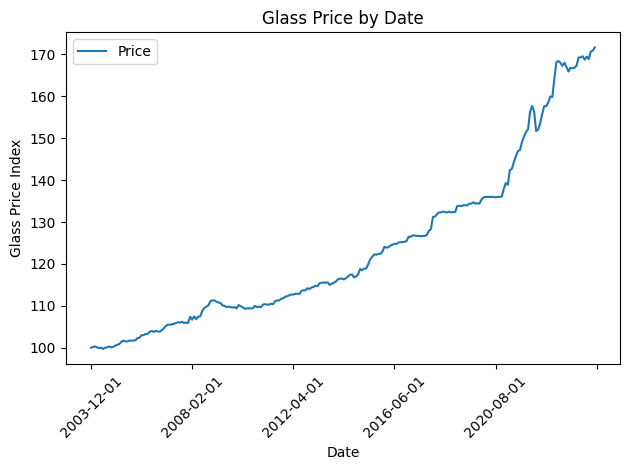

In [13]:
PPI_Glass.plot.line(x=cN[0], y=cN[1])
plt.title('Glass Price by Date')
plt.xlabel('Date')
plt.ylabel('Glass Price Index')
plt.xticks(rotation=45)
plt.tight_layout()

### Lumber Price by Date
Same as the glass except measurements started beting taken back in 1926.

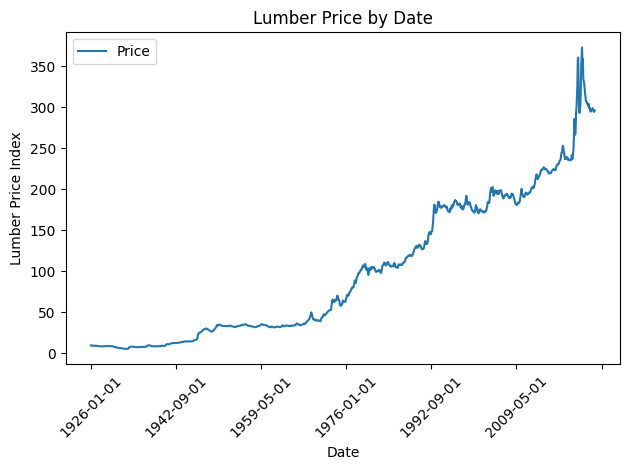

In [14]:
PPI_Lumber.plot.line(x=cN1[0], y=cN1[1])
plt.title('Lumber Price by Date')
plt.xlabel('Date')
plt.ylabel('Lumber Price Index')
plt.xticks(rotation=45)
plt.tight_layout()

### Asphalt Price by Date
This index began being recorded in 1975.

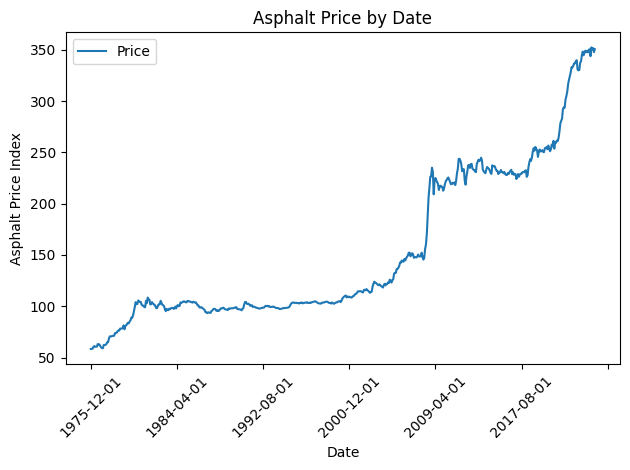

In [15]:
PPI_Asphalt.plot.line(x=cN2[0], y=cN2[1])
plt.title('Asphalt Price by Date')
plt.xlabel('Date')
plt.ylabel('Asphalt Price Index')
plt.xticks(rotation=45)
plt.tight_layout()

### Cement Price by Date
This index began in 2003.

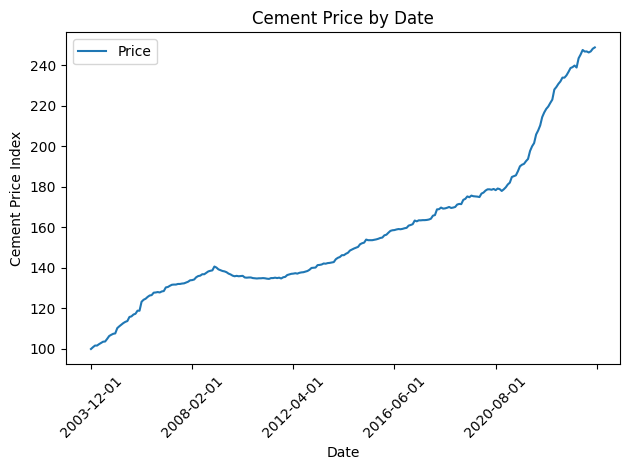

In [16]:
PPI_Cement.plot.line(x=cN3[0], y=cN3[1])
plt.title('Cement Price by Date')
plt.xlabel('Date')
plt.ylabel('Cement Price Index')
plt.xticks(rotation=45)
plt.tight_layout()

### Plumbing Materials Price by Date
This index began in 1947.

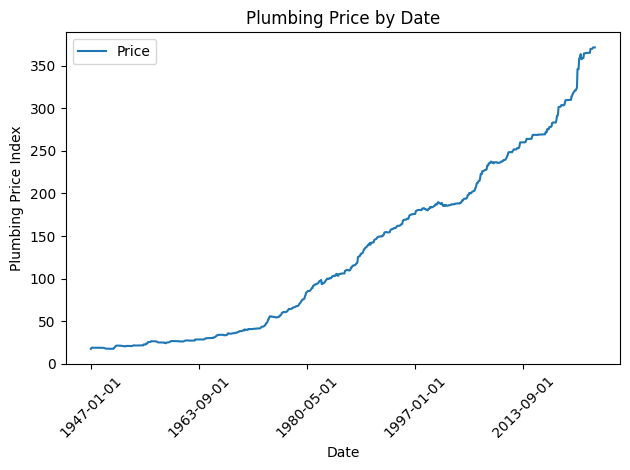

In [17]:
PPI_Plumbing.plot.line(x=cN4[0], y=cN4[1])
plt.title('Plumbing Price by Date')
plt.xlabel('Date')
plt.ylabel('Plumbing Price Index')
plt.xticks(rotation=45)
plt.tight_layout()

### Metals Price by Date
This index begain the latest at 2010.

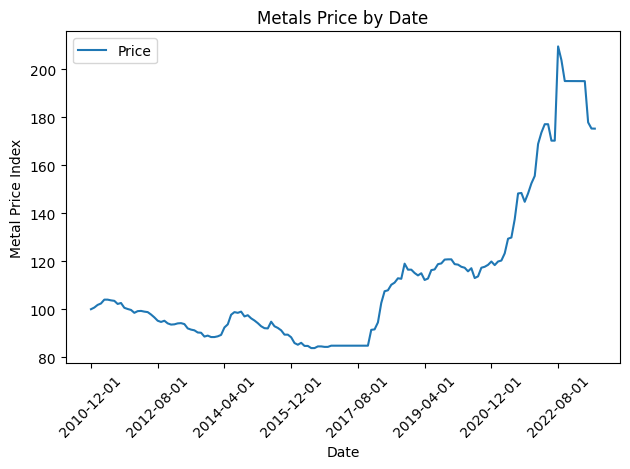

In [18]:
PPI_Metals.plot.line(x=cN5[0], y=cN5[1])
plt.title('Metals Price by Date')
plt.xlabel('Date')
plt.ylabel('Metal Price Index')
plt.xticks(rotation=45)
plt.tight_layout()

### Inflation by Date
These measurements began in 1947 and are also indexed.

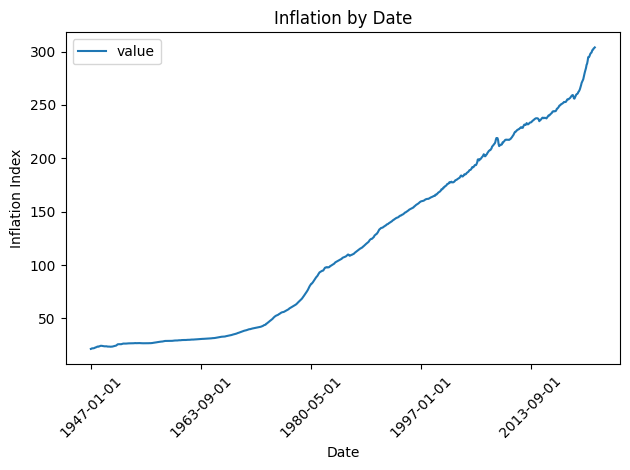

In [19]:
Inflation.plot.line(x=cN6[0], y=cN6[1])
plt.title('Inflation by Date')
plt.xlabel('Date')
plt.ylabel('Inflation Index')
plt.xticks(rotation=45)
plt.tight_layout()

### Sticky Price: Inflation by Date
This is another inflation dataset, although this one is not maintained or recorded by the government. Its data is also much different from the other inflation dataset. Since the other inflation dataset matches the price increase of other commodities better, we will be using it for future calculations. This is also not an index.

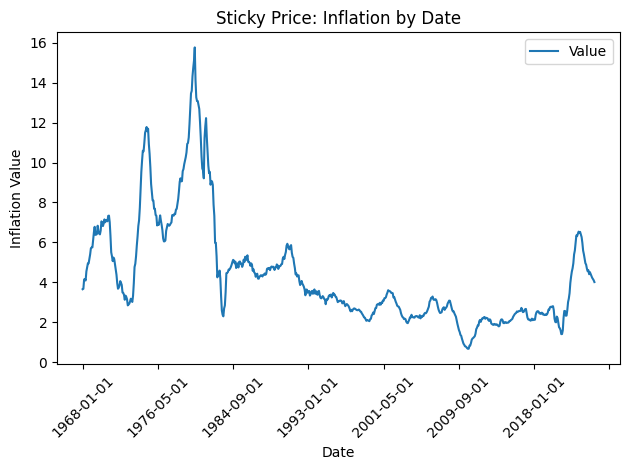

In [20]:
# Ignore as this dataset will most likely not be used
StickyPrice.plot.line(x=cN7[0], y=cN7[1])
plt.title('Sticky Price: Inflation by Date')
plt.xlabel('Date')
plt.ylabel('Inflation Value')
plt.xticks(rotation=45)
plt.tight_layout()

### Commerial Real Estate Prices by Date
This dataset, also an index, began measurements in 2005. There appears to be a slight dip in real estate value around 2008.

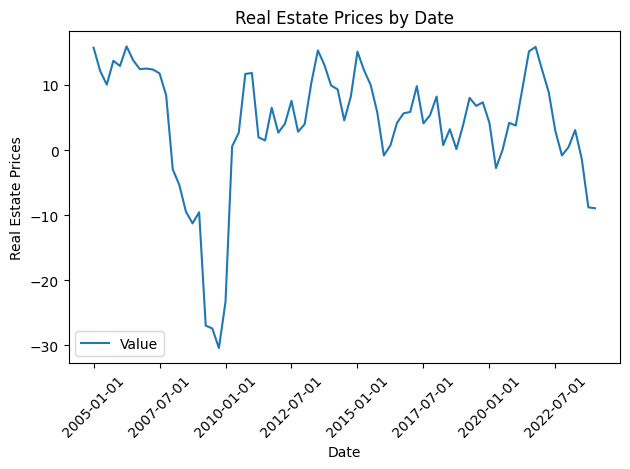

In [21]:
ComRealPri.plot.line(x=cN8[0], y=cN8[1])
plt.title('Real Estate Prices by Date')
plt.xlabel('Date')
plt.ylabel('Real Estate Prices')
plt.xticks(rotation=45)
plt.tight_layout()

### Glass Histplot
In order to conserve space and time, we will only be doing one example of the reamining plots. This is a histogram of PPI_Glass prices in our recorded range. Measurements started in December 2003 and have been taken monthly with data up to August 2024

<Axes: xlabel='Price', ylabel='Count'>

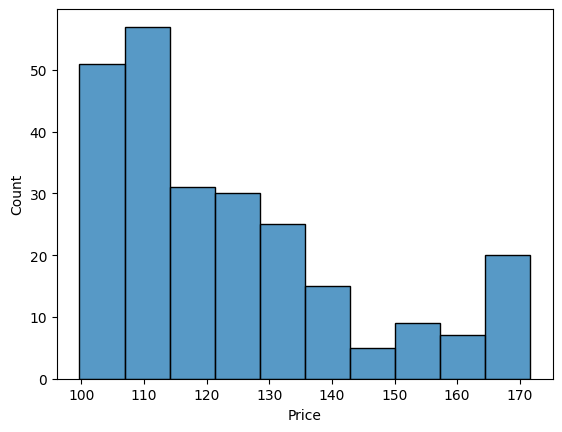

In [22]:
# Since we are using a lot of different datasets for now I will used the SNS methods just for Glass Prices
sns.histplot(PPI_Glass,x=cN[1])

### Glass Kdeplot
Analagous to the above histogram, this is the kernal density plot for PPI_Glass.

<Axes: xlabel='Price', ylabel='Density'>

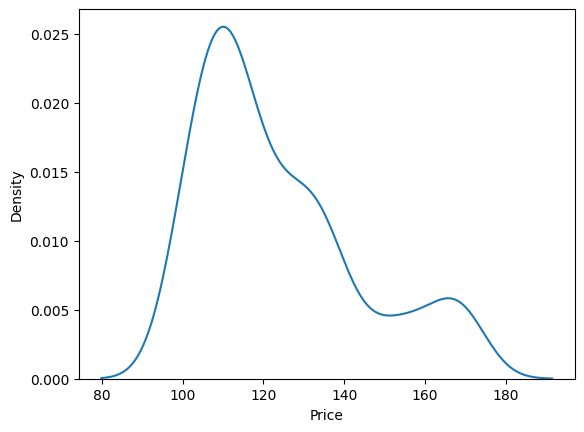

In [23]:
sns.kdeplot(PPI_Glass,x=cN[1])

### Countplot
For the metals dataset, we are now demonstrating a countplot. To improve readability, I have binned the data into groups of 15.

Text(0.5, -10.914633430759954, 'Metals Binned')

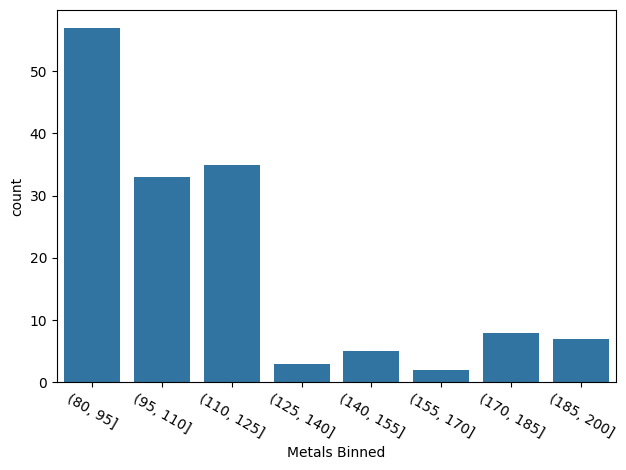

In [24]:
bin_edge = [80, 95, 110, 125, 140, 155, 170, 185, 200]
PPI_Metals_Binned = PPI_Metals
PPI_Metals_Binned["Binned"] = pd.cut(PPI_Metals[PPI_Metals.columns[1]], bins = bin_edge)
sns.countplot(PPI_Metals_Binned,x = PPI_Metals_Binned['Binned'])
plt.xticks(rotation = -30)
plt.tight_layout()
plt.xlabel("Metals Binned")

### Boxplot
An SNS boxplot, this is based on our glass dataset. It makes the quartiles of our dataset easy to notice.

<Axes: xlabel='Price'>

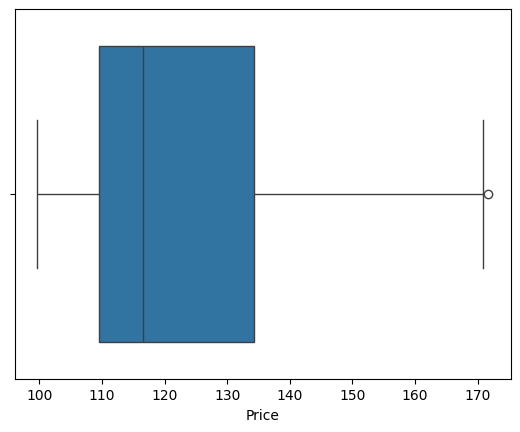

In [25]:
sns.boxplot(PPI_Glass,x=cN[1])

### Violin Plot
The last plot for this section is a Violin plot. It is effectively a combination of a box plot and a KDE plot. Used on our glass data, it is showing the data density at the boxplot quartiles.

<Axes: xlabel='Price'>

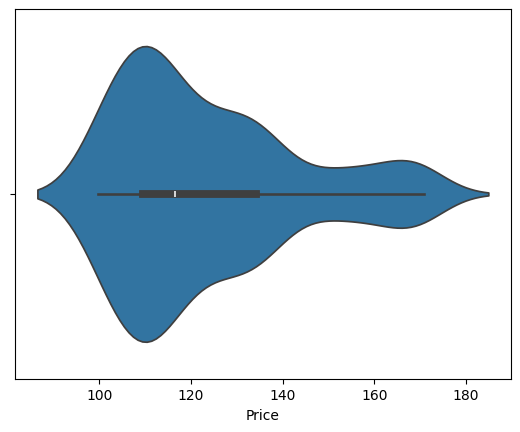

In [26]:
sns.violinplot(PPI_Glass,x=cN[1])

# (3) Two-Feature Plots - LJ
For this section, we are asked to show an example of sns.scatterplot, sns.swarmplot, and sns.stripplot with alterations to the Hue, Style, and Size.

## Scatter Plot
For the scatterplot, I will be showing values for some of the states in the Zillow Dataset. For now, I will be showing California, Texas, Florida, and New York. It displays the price of of the aformentioned states from 2000 until 2024.

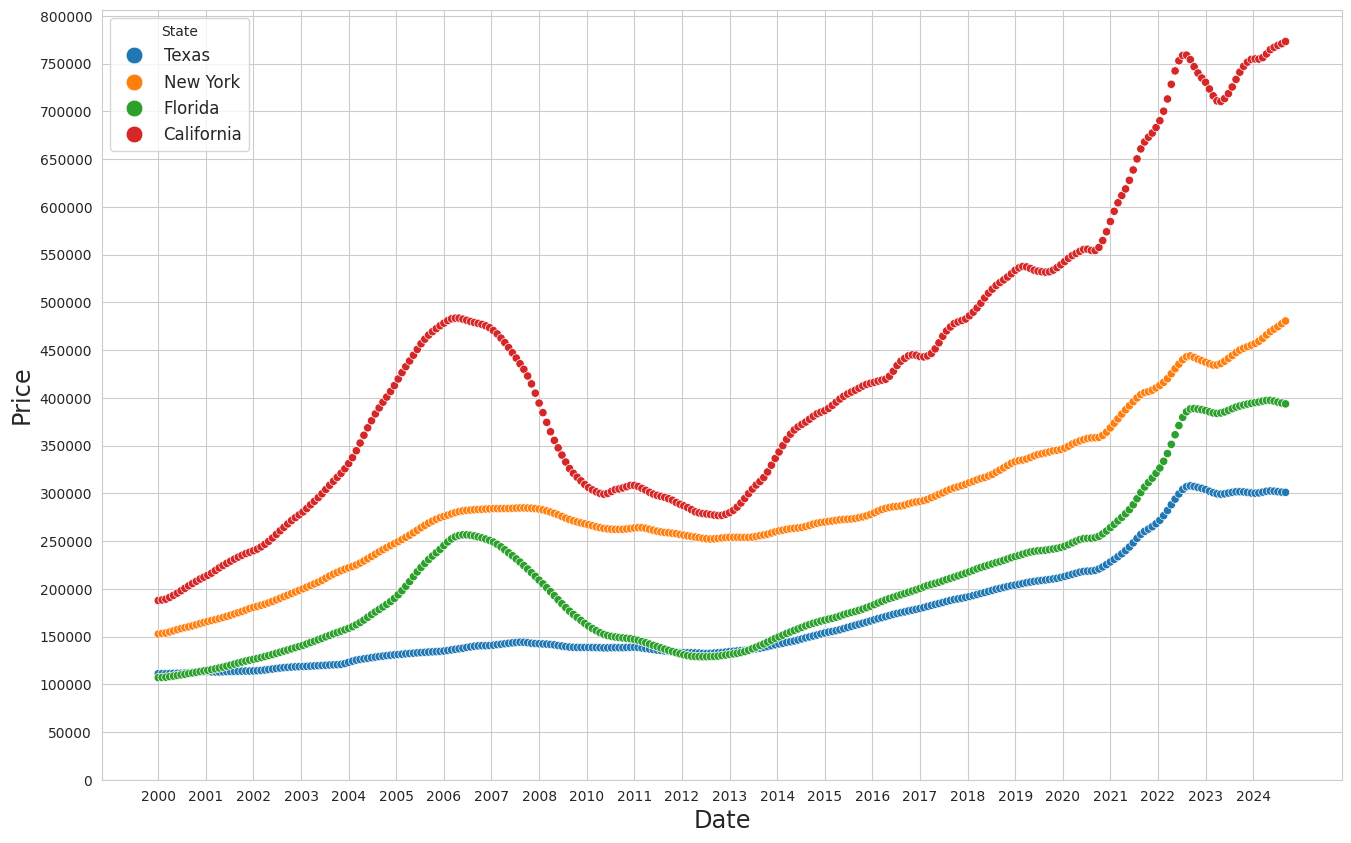

In [185]:
Zillow_long = pd.melt(Zillow, id_vars=Zillow.columns[0],
                     value_vars=[Zillow.columns[i] for i in [6, 4, 3, 2]],  # Texas, New York, Florida, California
                     var_name='State_Name', value_name='State')
Zillow_long = Zillow_long.rename(columns={Zillow.columns[0]: 'Date'})

plt.figure(figsize=(16,10))
sns.set_style("whitegrid")
plt.xlabel("Date",  fontsize = "xx-large")
plt.ylabel("Price", fontsize = "xx-large")
sns.scatterplot(data=Zillow_long,x=Zillow_long.Date,y=Zillow_long.State, hue='State_Name')
plt.yticks(range(0, int(Zillow_long['State'].max()) + 50000, 50000))
plt.minorticks_off
plt.xscale("linear")
plt.xticks(minor = True)
plt.xticks(ticks = [0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 100, 112.5, 125, 137.5, 150, 162.5, 175, 187.5, 200, 212.5, 225, 237.5, 250, 262.5, 275, 287.5],
           labels = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024"])
plt.legend(title='State', loc='upper left', fontsize="12", markerscale=2)

This scatter plot shows that the prices of houses in four of the biggest markets in the United States have risen, strangely both Florida and California had major spikes in housing cost from the years of 2004 to 2008. Neither Texas of New York had such a spike in that time period. Florida also noticed a far larger increasein price since 2014.

## Strip Plot
For our strip plot, I have decided to include the data on all 50 states. This is difficult to look at and following an individual states value can be difficullt. I've kept it like this to show that sometimes, you should not include every piece of data on a single plot.

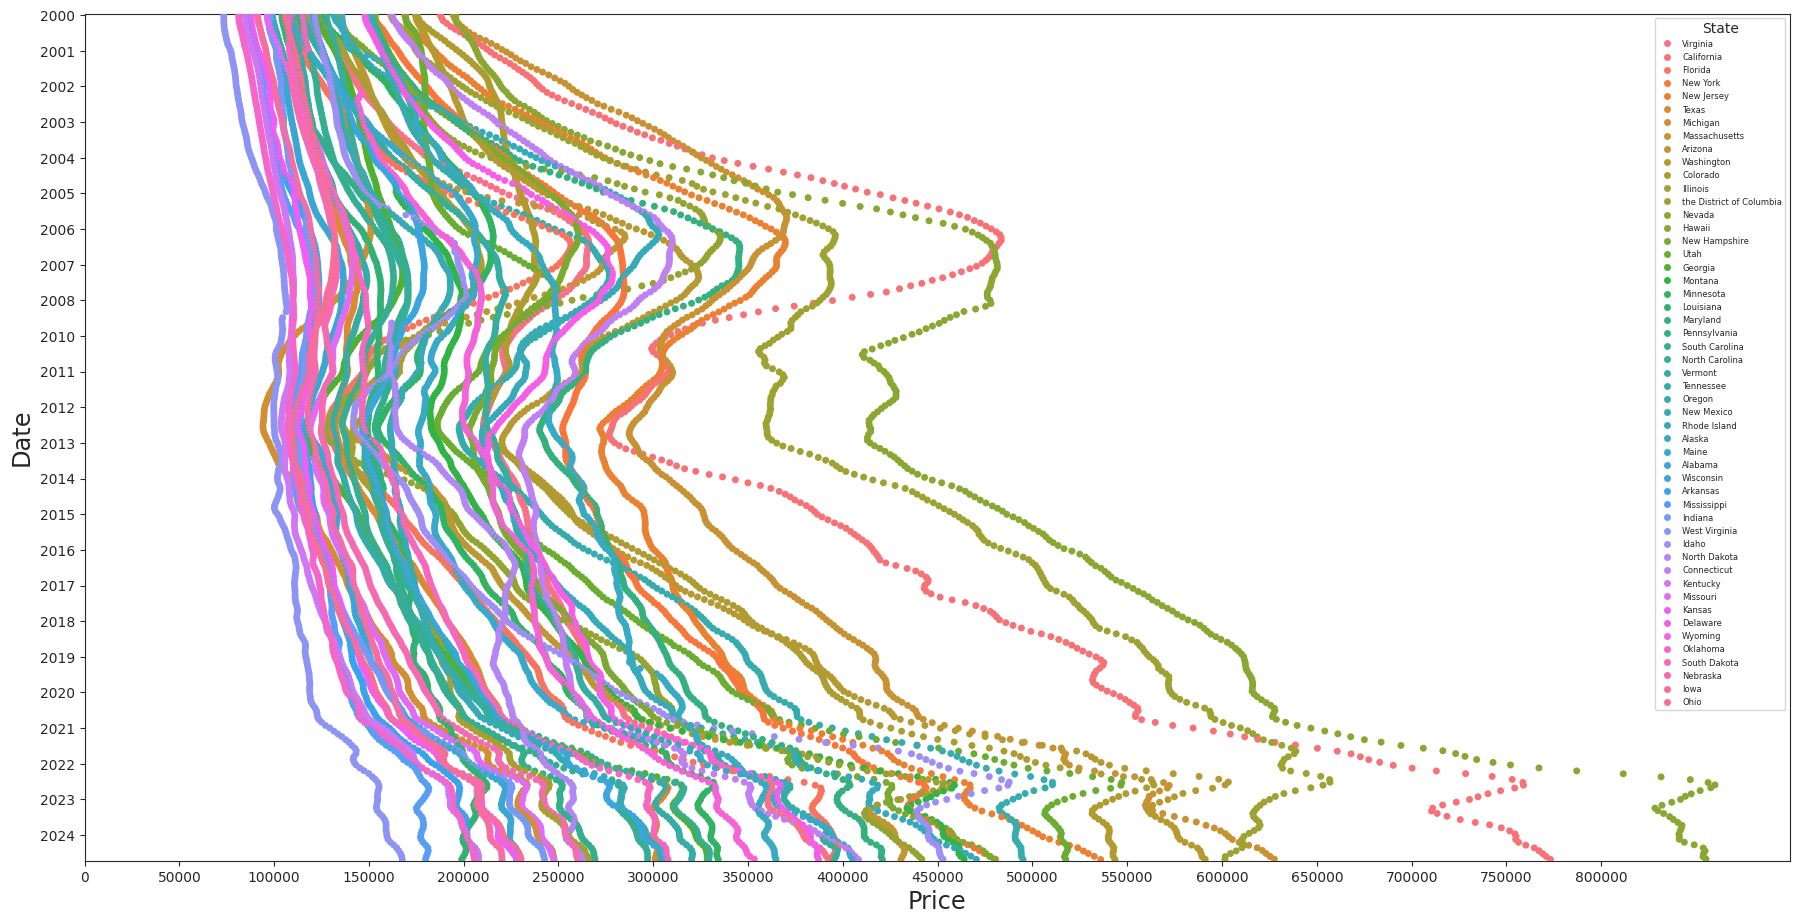

In [184]:
ZillowFull = pd.melt(Zillow, id_vars=Zillow.columns[0],
                     value_vars=[Zillow.columns[i] for i in range(1, 52)],
                     var_name='State_Name', value_name='State')
ZillowFull = ZillowFull.rename(columns={Zillow.columns[0]: 'Date'})
sns.set_style("ticks")
plt.figure(figsize=(22,11))
sns.stripplot(ZillowFull,x=ZillowFull.State, y=ZillowFull.Date,hue='State_Name')
plt.xticks(range(0, int(Zillow_long['State'].max()) + 50000, 50000))
plt.xlabel("Price",  fontsize = "xx-large")
plt.ylabel("Date", fontsize = "xx-large")
plt.yticks(ticks = [0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 100, 112.5, 125, 137.5, 150, 162.5, 175, 187.5, 200, 212.5, 225, 237.5, 250, 262.5, 275, 287.5],
           labels = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024"])
plt.legend(title='State', loc='upper right', fontsize="6", markerscale=1)

As previosly mentioned, this plot shows what happens when you include to much data on a single plot. Although, some information can still be gained from this. We can tell that a large amount of the states had similar home prices. Only a few states noticed far larger spikes in price.

## Swarm plot
Lastly our swarmplot. It is covering the states of California, Texas, Florida, Vermont, Michigan, Arizona, and Colorado. It compares price against time for each of the states. The x axis scale is not perfectly scaled to the y data due to size constraints, but it's very close.

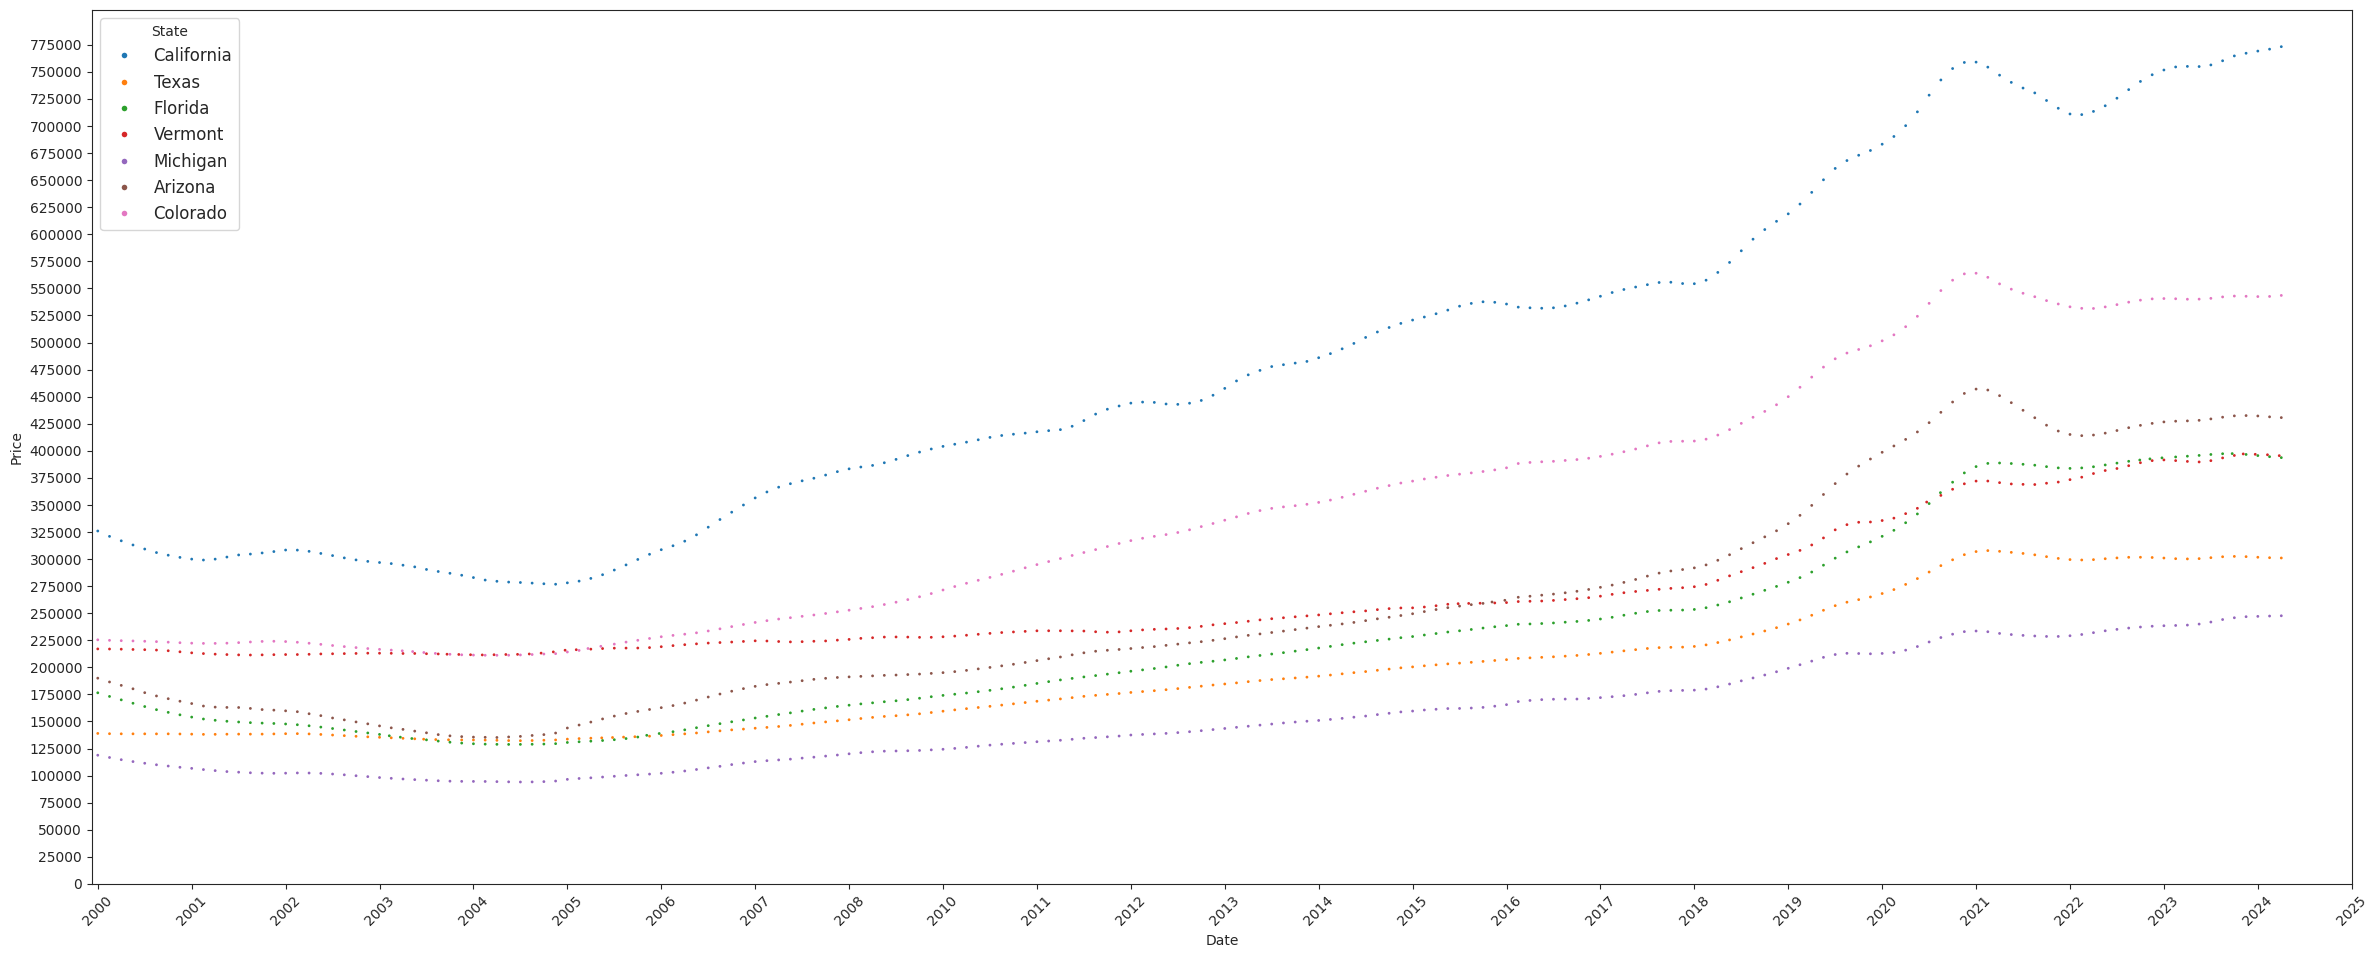

In [29]:
ZillowEdit = Zillow
ZillowEdit = ZillowEdit.rename(columns={ZillowEdit.columns[0]: 'Date'})
ZillowEdit = ZillowEdit.dropna()
ZillowEditmelted = pd.melt(ZillowEdit, id_vars='Date', value_vars=['California', 'Texas', 'Florida', 'Vermont', 'Michigan', 'Arizona', 'Colorado'], var_name='State', value_name='Price')
plt.figure(figsize=(24,10))
plt.xticks(rotation=45)
sns.swarmplot(x='Date', y='Price', hue='State', data=ZillowEditmelted, size=2)
plt.tight_layout()
plt.legend(title='State', loc='upper left', fontsize="12", markerscale=2)
plt.xticks(ticks = [0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112, 120, 128, 136, 144, 152, 160, 168, 176, 184, 192],
           labels = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])
plt.yticks(range(0, int(Zillow_long['State'].max()) + 25000, 25000))
plt.show()
#print(ZillowEditmelted)

This plot like the scatterplot shows that as one states prices of homes increases, it normally does in all the states. But as we saw in the previous plot, some states do expierence bigger rises and falls.

# (4) Summarization of Data - LJ
Summarizes the data using df.shape, df.info(), and df.describe(include = "all")

#### Glass

In [66]:
PPI_Glass.shape
PPI_Glass.info()
PPI_Glass.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    250 non-null    object 
 1   Price   250 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


,DATE,Price
count,250,250.00
unique,250,NaN
top,2003-12-01,NaN
freq,1,NaN
mean,NaN,123.64
std,NaN,19.93
min,NaN,99.70
25%,NaN,109.52
50%,NaN,116.50
75%,NaN,134.30


#### Lumber

In [65]:
PPI_Lumber.shape
PPI_Lumber.info()
PPI_Lumber.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    1185 non-null   object 
 1   Price   1185 non-null   float64
dtypes: float64(1), object(1)
memory usage: 18.6+ KB


,DATE,Price
count,1185,1185.00
unique,1185,NaN
top,1926-01-01,NaN
freq,1,NaN
mean,NaN,100.04
std,NaN,87.33
min,NaN,5.30
25%,NaN,31.60
50%,NaN,64.90
75%,NaN,179.70


#### Asphalt

In [64]:
PPI_Asphalt.shape
PPI_Asphalt.info()
PPI_Asphalt.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    586 non-null    object 
 1   Price   586 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


,DATE,Price
count,586,586.00
unique,586,NaN
top,1975-12-01,NaN
freq,1,NaN
mean,NaN,153.97
std,NaN,76.72
min,NaN,58.40
25%,NaN,99.10
50%,NaN,108.45
75%,NaN,228.90


#### Cement

In [63]:
PPI_Cement.shape
PPI_Cement.info()
PPI_Cement.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    250 non-null    object 
 1   Price   250 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


,DATE,Price
count,250,250.00
unique,250,NaN
top,2003-12-01,NaN
freq,1,NaN
mean,NaN,157.06
std,NaN,35.31
min,NaN,100.00
25%,NaN,135.00
50%,NaN,146.30
75%,NaN,174.98


#### Plumbing

In [62]:
PPI_Plumbing.shape
PPI_Plumbing.info()
PPI_Plumbing.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933 entries, 0 to 932
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    933 non-null    object 
 1   Price   933 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.7+ KB


,DATE,Price
count,933,933.00
unique,933,NaN
top,1947-01-01,NaN
freq,1,NaN
mean,NaN,130.91
std,NaN,101.39
min,NaN,17.40
25%,NaN,32.90
50%,NaN,106.00
75%,NaN,198.70


#### Metals

In [61]:
PPI_Metals.shape
PPI_Metals.info()
PPI_Metals.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   DATE    152 non-null    object  
 1   Price   152 non-null    float64 
 2   Binned  150 non-null    category
dtypes: category(1), float64(1), object(1)
memory usage: 3.1+ KB


,DATE,Price,Binned
count,152,152.00,150
unique,152,NaN,8
top,2010-12-01,NaN,"(80, 95]"
freq,1,NaN,57
mean,NaN,112.50,NaN
std,NaN,31.33,NaN
min,NaN,83.80,NaN
25%,NaN,91.57,NaN
50%,NaN,100.05,NaN
75%,NaN,118.65,NaN


#### Sticky Price

In [60]:
StickyPrice.shape
StickyPrice.info()
StickyPrice.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    681 non-null    object 
 1   Value   681 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.8+ KB


,DATE,Value
count,681,681.00
unique,681,NaN
top,1968-01-01,NaN
freq,1,NaN
mean,NaN,4.33
std,NaN,2.68
min,NaN,0.66
25%,NaN,2.46
50%,NaN,3.38
75%,NaN,5.18


#### ComRealPrice

In [59]:
ComRealPri.shape
ComRealPri.info()
ComRealPri.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    77 non-null     object 
 1   Value   77 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB


,DATE,Value
count,77,77.00
unique,77,NaN
top,2005-01-01,NaN
freq,1,NaN
mean,NaN,3.99
std,NaN,9.79
min,NaN,-30.40
25%,NaN,0.73
50%,NaN,5.35
75%,NaN,10.29


#### Inflation

In [58]:
Inflation.shape
Inflation.info()
Inflation.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    918 non-null    object 
 1   value   918 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.5+ KB


,date,value
count,918,918.00
unique,918,NaN
top,1947-01-01,NaN
freq,1,NaN
mean,NaN,117.79
std,NaN,83.74
min,NaN,21.48
25%,NaN,32.10
50%,NaN,106.90
75%,NaN,188.00


#### Zillow

In [30]:
ZillowRound = Zillow
ZillowRound.shape
ZillowRound.info()
ZillowRound.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      297 non-null    object 
 1   Virginia                  297 non-null    float64
 2   California                297 non-null    float64
 3   Florida                   297 non-null    float64
 4   New York                  297 non-null    float64
 5   New Jersey                297 non-null    float64
 6   Texas                     297 non-null    float64
 7   Michigan                  297 non-null    float64
 8   Massachusetts             297 non-null    float64
 9   Arizona                   296 non-null    float64
 10  Washington                297 non-null    float64
 11  Colorado                  297 non-null    float64
 12  Illinois                  297 non-null    float64
 13  the District of Columbia  297 non-null    float64
 14  Nevada    

,Date,Virginia,California,Florida,New York,New Jersey,Texas,Michigan,Massachusetts,Arizona,...,Kentucky,Missouri,Kansas,Delaware,Wyoming,Oklahoma,South Dakota,Nebraska,Iowa,Ohio
count,297,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,296.00,...,297.00,297.00,297.00,297.00,270.00,297.00,296.00,297.00,297.00,297.00
unique,297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,242488.31,429145.13,207179.48,288656.41,322526.22,170325.95,147371.77,365521.56,233011.82,...,122494.35,147074.45,132035.81,250994.49,227735.07,122222.99,174020.48,151438.91,136942.68,137675.35
std,NaN,63730.11,156266.88,79452.69,77960.39,79099.36,58160.31,40109.98,99571.81,89852.06,...,31943.86,38018.71,35251.78,58175.47,53584.35,32100.63,56257.25,41923.50,33495.73,32365.92
min,NaN,123345.47,187686.83,106914.49,152590.52,168867.68,111067.07,94106.30,194441.92,134673.83,...,84888.60,96355.62,87834.71,147889.12,143894.46,81317.07,107542.72,107906.33,91262.66,105495.85
25%,NaN,214351.97,301556.59,144823.91,253787.07,278516.15,132901.50,121184.68,303774.76,160742.17,...,104538.12,123671.96,112836.89,216604.69,200597.70,103589.95,138535.78,125520.84,117911.36,116621.97
50%,NaN,237064.01,412385.37,188508.75,273168.67,310641.73,141492.32,139304.56,341643.68,207504.59,...,109412.20,134960.05,118984.89,246237.74,214299.00,110293.63,150640.97,131850.81,122889.18,126542.66
75%,NaN,265324.56,523548.17,243882.46,326718.84,357889.49,201412.42,160608.48,412832.63,272287.70,...,132860.29,157237.97,143458.38,273233.50,245455.18,130922.18,199129.85,168436.58,152967.51,143455.34


## Summary
These built in functions show us a lot of details about each of the datasets. ALthough, a large majority of this we did already know from earilier manuipulation.

# (5) Visualization of Data - LJ
Here we will be showing the requested histogram, boxplot, and scatter matrix

## Histogram
To spare our computing power, I will not do this to the Zillow Dataset, Instead I will apply this to all of the PPI datasets.

### PPI_Glass
The histogram of glass shows that price spent a longer amount of time on the lower end of the price range.

Text(0.5, 1.0, 'Glass')

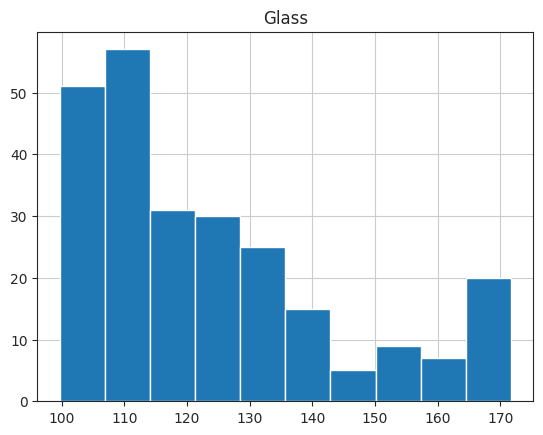

In [40]:
PPI_Glass.hist()
plt.title("Glass")

### PPI_Lumber
The difference is even more extreme in the lumber dataset, with the lowest price grouping being the majority by far.

Text(0.5, 1.0, 'Lumber')

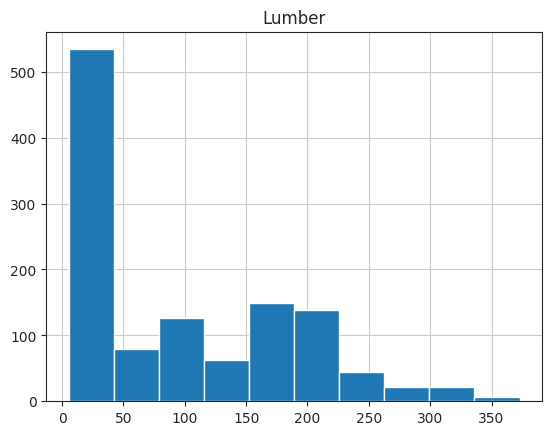

In [41]:
PPI_Lumber.hist()
plt.title("Lumber")

### PPI_Asphalt
Asphalt shows the same extreme distribution as lumber, being strongly sided towards the cheaper side, indidcating it's spent far longer at lower prices.

Text(0.5, 1.0, 'Asphalt')

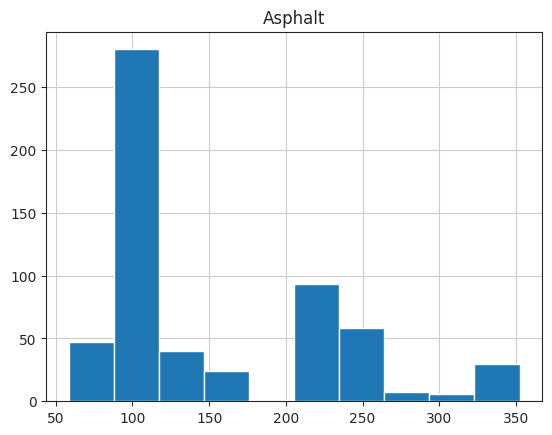

In [42]:
PPI_Asphalt.hist()
plt.title("Asphalt")

### PPI_Cement
Cement is the first of the histograms to show a more middle focused distribution

Text(0.5, 1.0, 'Cement')

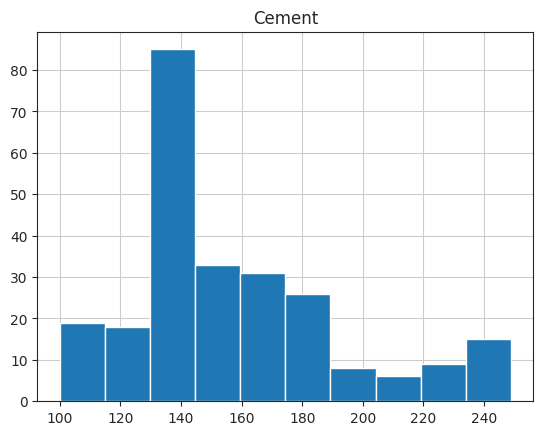

In [43]:
PPI_Cement.hist()
plt.title("Cement")

### PPI_Plumbing
Like Lumber, plumbing materials have historically been cheaper more often than expensive.

Text(0.5, 1.0, 'Plumbing')

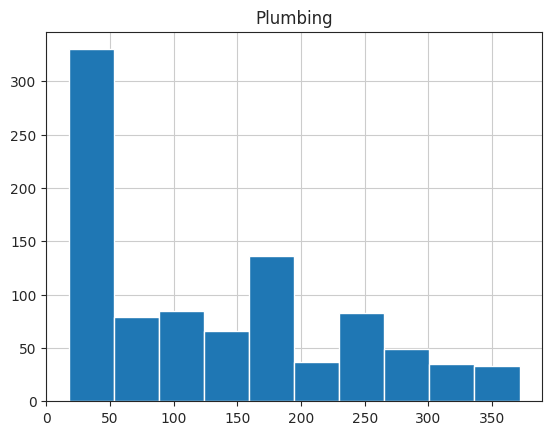

In [44]:
PPI_Plumbing.hist()
plt.title("Plumbing")

### PPI_Metals
Metals is also left justified, showing to be cheaper more often than it is epensive.

Text(0.5, 1.0, 'Metals')

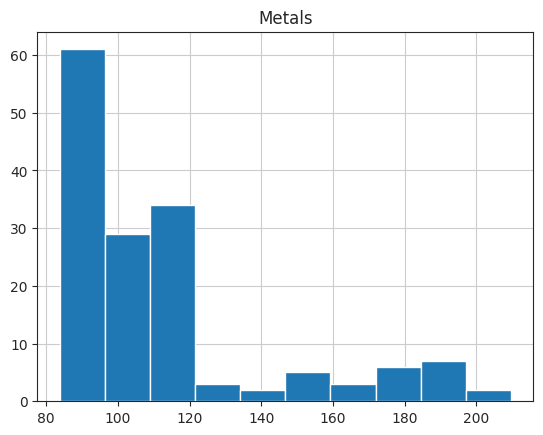

In [45]:
PPI_Metals.hist()
plt.title("Metals")

### Summary/Observations
All of the plots are more justified to the left side, meaning things over the course of history have been cheaper than they are now. This aligns with how inflation normally works. Even stronger justification for this conclusion is that the two sets that started recording earliest, lumber and plumbing, had the most values on the lower end


## Boxplot
For the boxplot, I think the best looking of the options is the Inflation Dataset.

Text(0.5, 1.0, 'Inflation Boxplot')

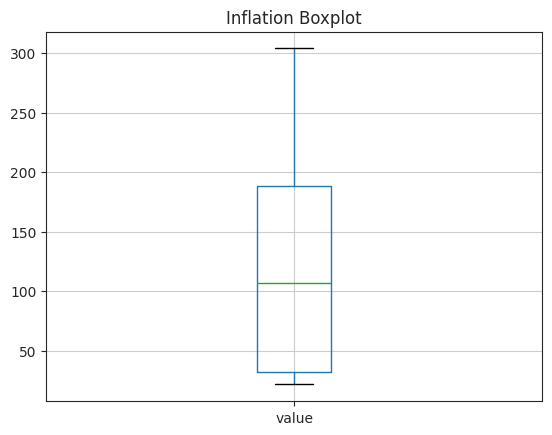

In [46]:
Inflation.boxplot()
plt.title("Inflation Boxplot")

The Boxplot shows us that the values are focused on the lower side, with a few big outliers.

## Scatter Matrix
For the scatter matrix, I have combined the PPI_Glass and PPI_Lumber into a single dataset, so that they can be compared against eachother. This are a combination of a scatter plot and a histogram. So the y axis are all counts/occurences of the x value which is the inexed price.

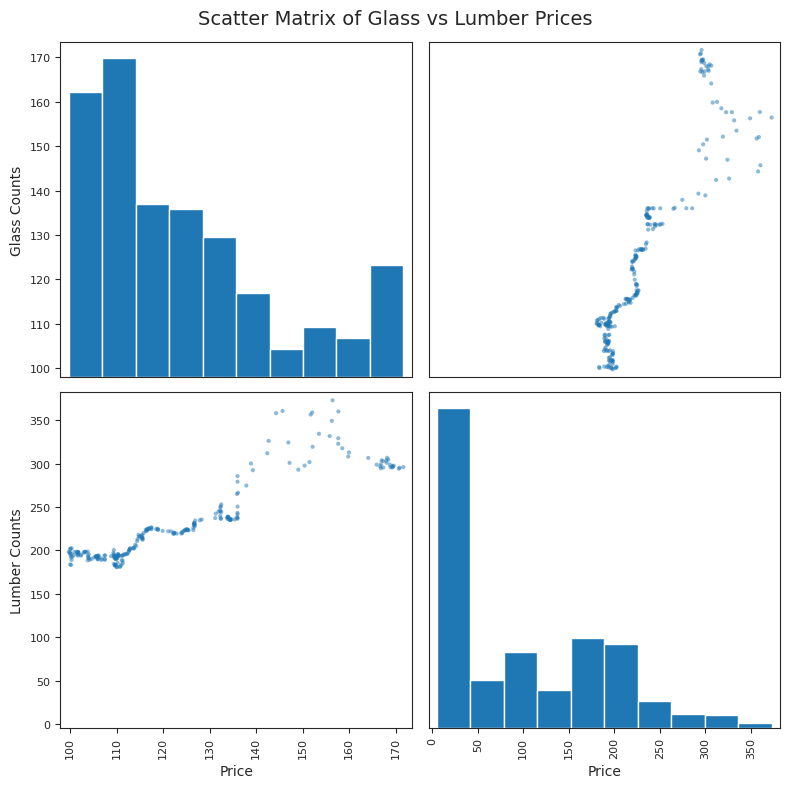

In [117]:
GVL = pd.merge(PPI_Glass, PPI_Lumber, on='DATE', how='outer')
axes = pd.plotting.scatter_matrix(GVL, figsize = (8,8))
plt.suptitle("Scatter Matrix of Glass vs Lumber Prices", fontsize=14)
axes[1, 0].set_xlabel("Price")
axes[1, 0].set_ylabel("Lumber Counts")
axes[1, 1].set_xlabel("Price")
axes[0, 0].set_ylabel("Glass Counts")
plt.tight_layout()
plt.show()

### Scatter Matrix Conclusion
The Scatter Matrix can be helpful, but for us, we mostly only care about the histograms and we viewed those earlier. Labeling this type of plot is difficult, but I think we managed to get across the necessary information.

# (6) Detecting Outliers - LJ

It's worth mentioning that our datasets obtained from Kaggle are unlikely to have any unatural outliers. So, this will primarly focus on non-kaggle datasets.

## PPI-Glass
Using the scatter plot below to look for extreme outliers, I don't notice any, I should use some of the mathematical methods to look for them when time allows. Also, I had to manually mess with the x ticks in order to make the label visible, it is off slightly on the dates, but is still useful for visualizing outliers.

Text(0.5, 1.0, 'Glass Price by Date')

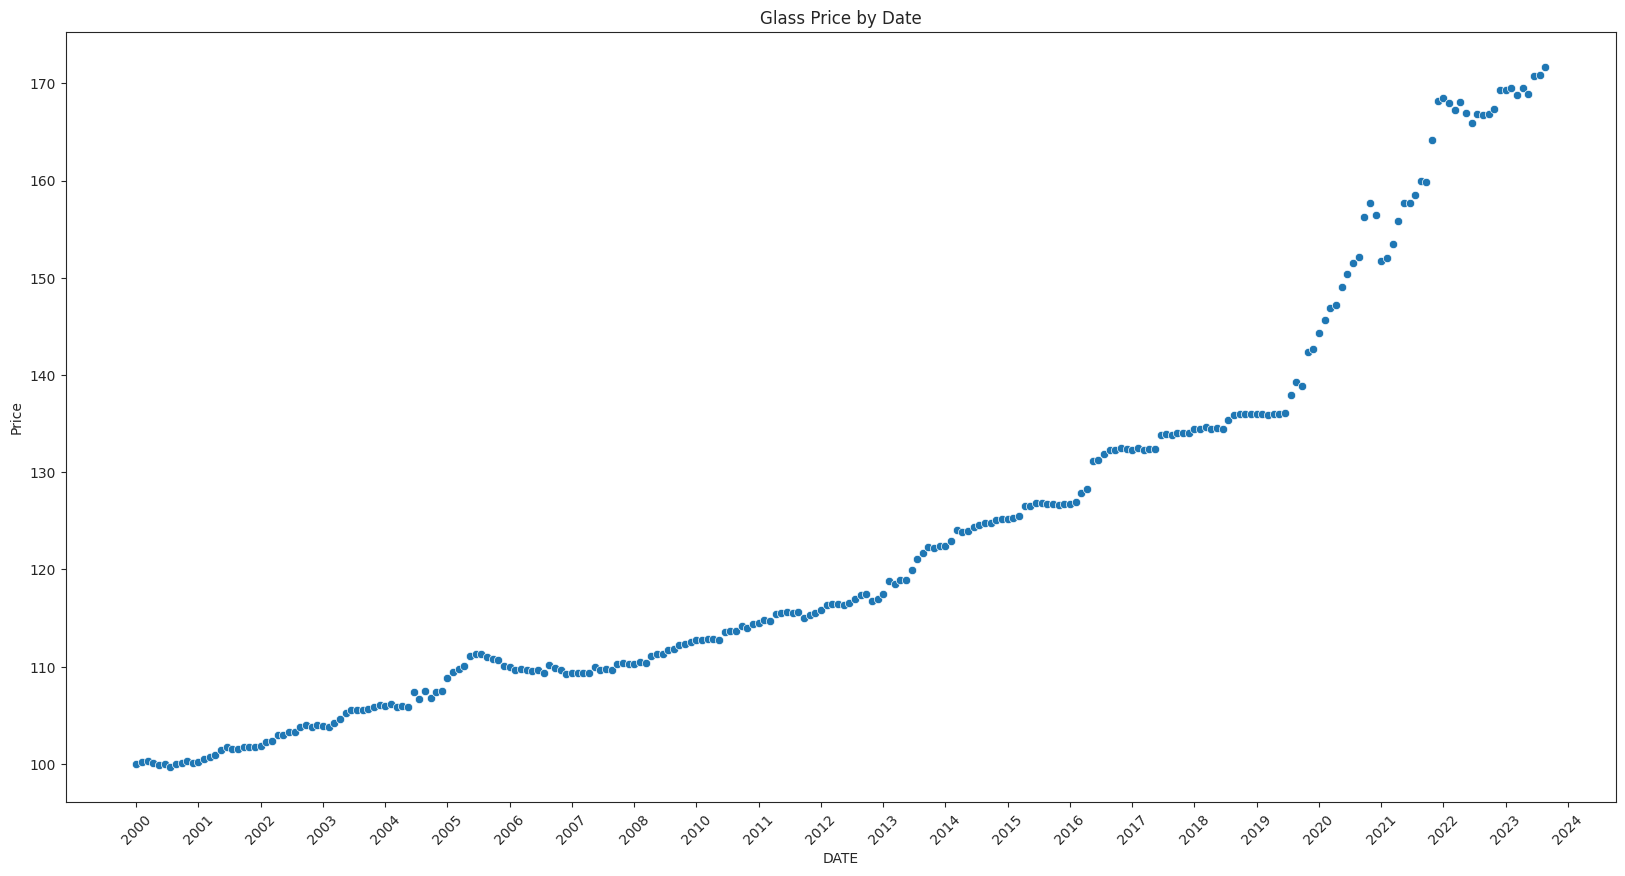

In [132]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45,ticks = [0, 11, 22, 33, 44, 55, 66, 77, 88, 99, 110, 121, 132, 143, 154, 165, 176, 187, 198, 209, 220, 231, 242, 253, 264],
           labels = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])
sns.scatterplot(PPI_Glass, x = PPI_Glass.columns[0], y = PPI_Glass.columns[1])
plt.title('Glass Price by Date')

## PPI-Lumber
The Lumber dataset doesn't have any obvious outliers, but it does begin behaving strangely near the end of our current data,  jumping around in price a lot.

<Axes: xlabel='DATE', ylabel='Price'>

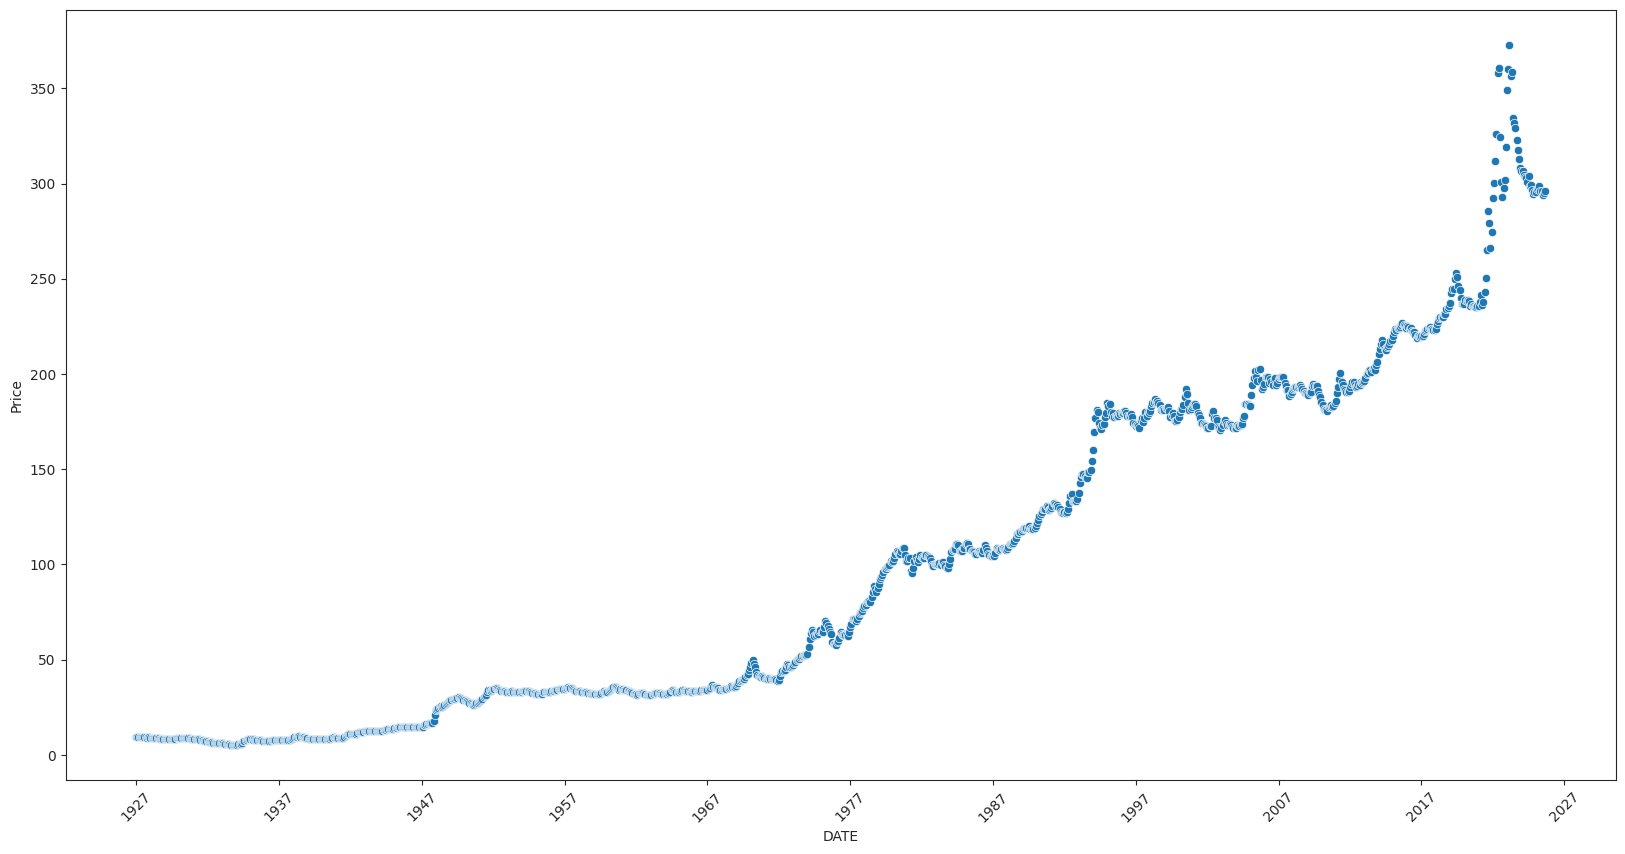

In [130]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45,ticks = [0, 120, 240, 360, 480, 600, 720, 840, 960, 1080, 1200],
           labels = ["1927", "1937", "1947", "1957", "1967", "1977", "1987", "1997", "2007", "2017", "2027"])
sns.scatterplot(PPI_Lumber, x = PPI_Lumber.columns[0], y = PPI_Lumber.columns[1])
plt.title('Lumber Price by Date')

## PPI-Plumbing
I don't see any major outliers here, but I do notice a very very quick spike near the 2020's, far larger than any of the other spikes or dips.

Text(0.5, 1.0, 'Plumbing Price by Date')

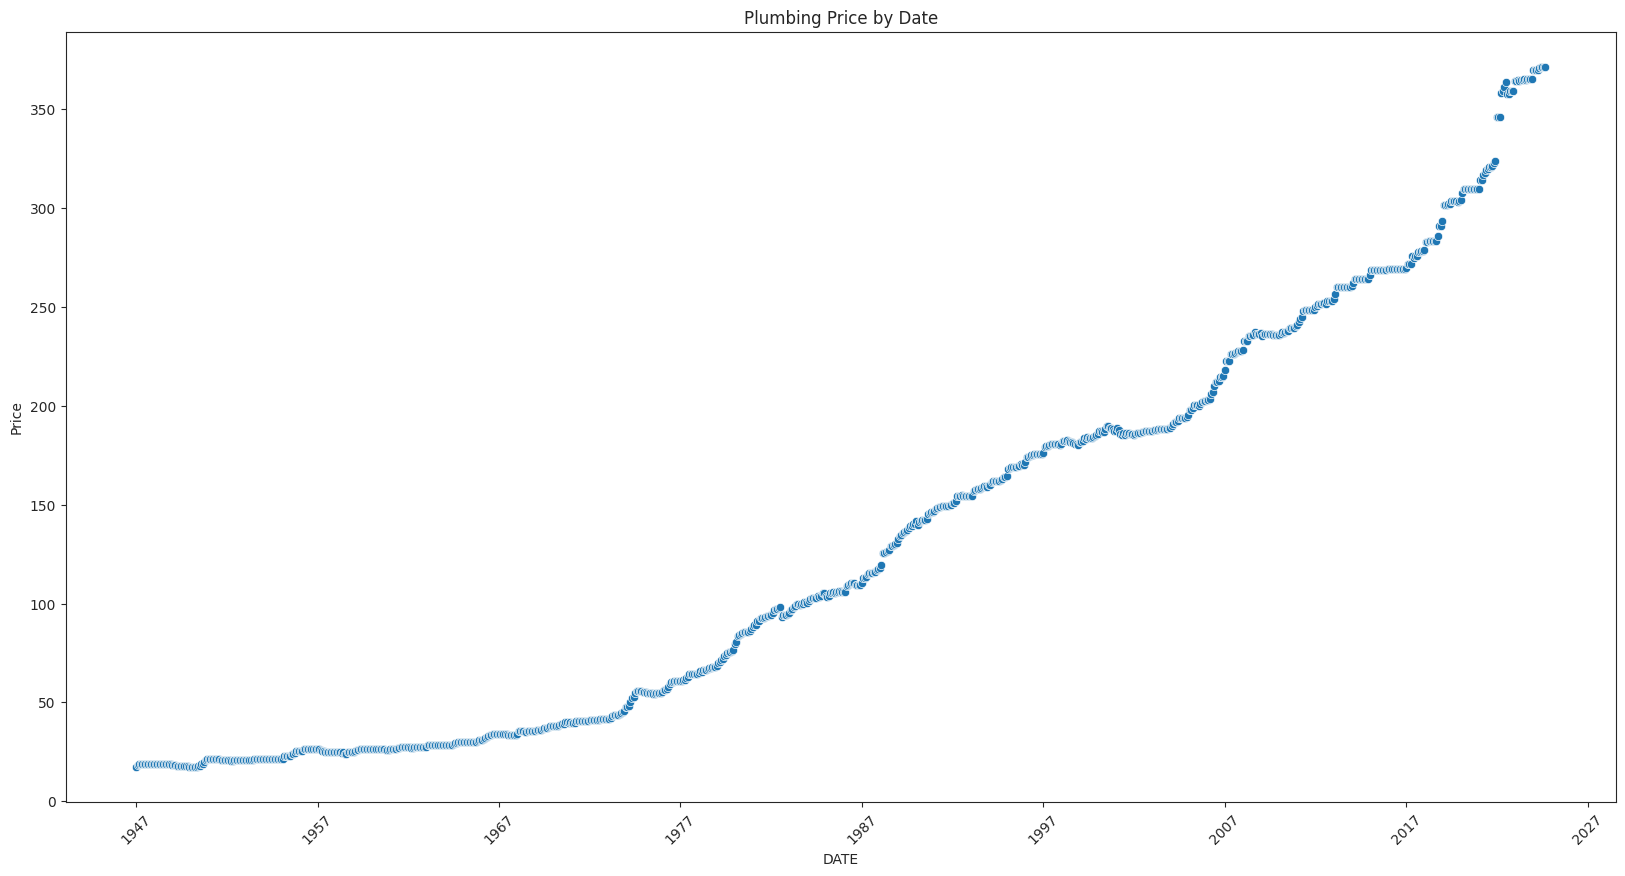

In [135]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45,ticks = [0, 120, 240, 360, 480, 600, 720, 840, 960],
           labels = ["1947", "1957", "1967", "1977", "1987", "1997", "2007", "2017", "2027"])
sns.scatterplot(PPI_Plumbing, x = PPI_Plumbing.columns[0], y = PPI_Plumbing.columns[1])
plt.title('Plumbing Price by Date')

## PPI-Asphalt
Interestingly, it seems that asphalt tends to jump very quickly when its price increases, rather than a smooth trend.

Text(0.5, 1.0, 'Asphalt Price by Date')

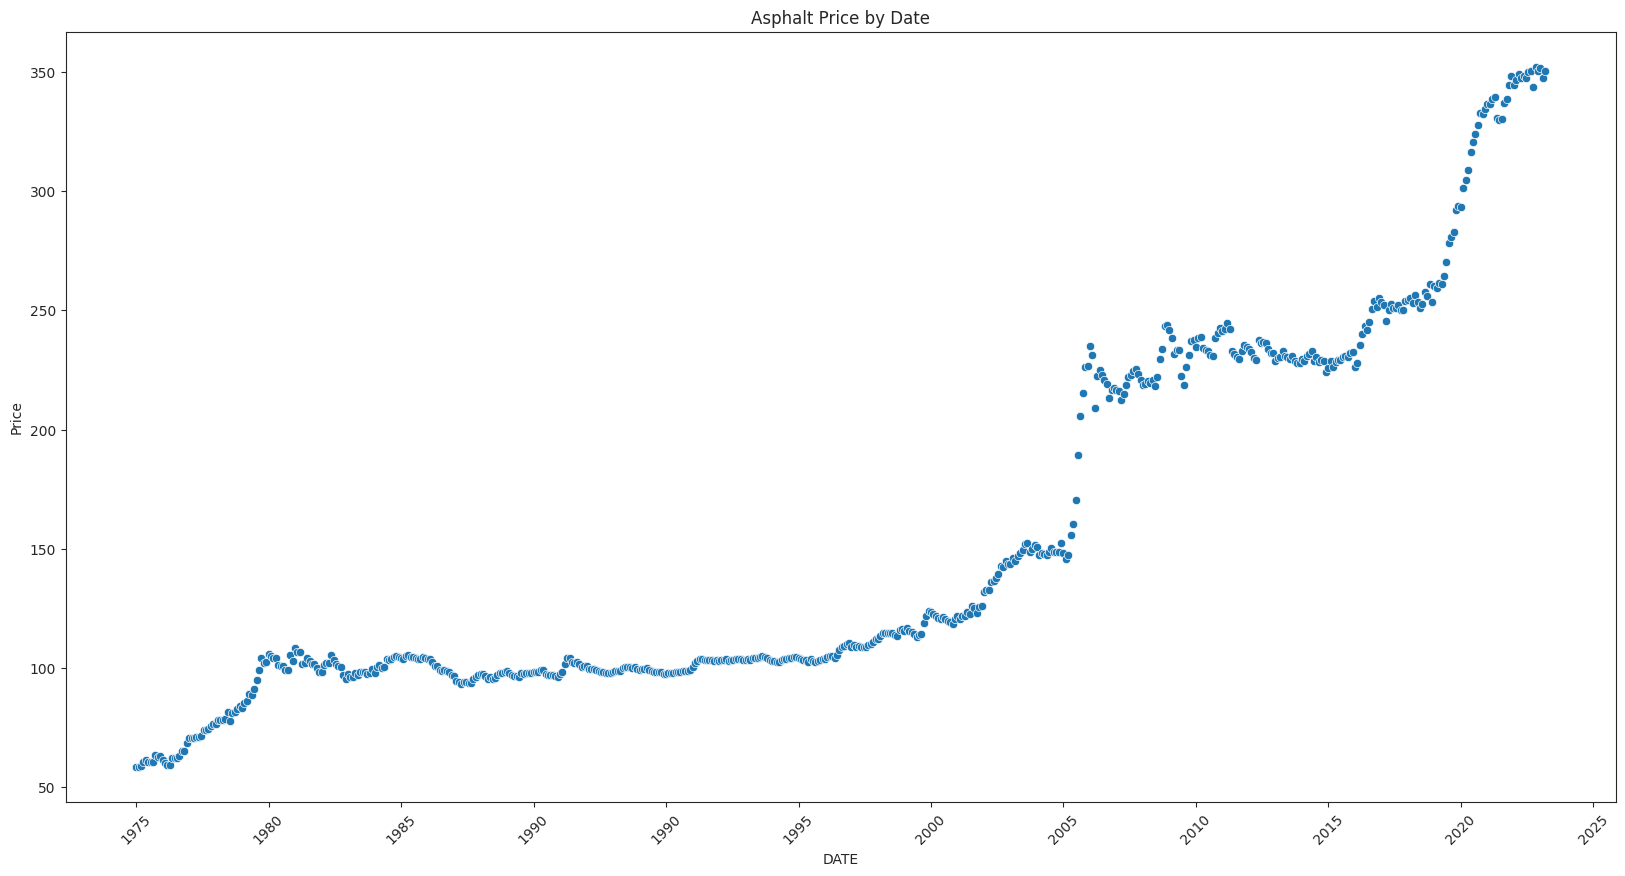

In [143]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45,ticks = [0, 55, 110, 165, 220, 275, 330, 385, 440, 495, 550, 605],
           labels = ["1975", "1980", "1985", "1990", "1990", "1995", "2000", "2005", "2010", "2015", "2020", "2025"])
sns.scatterplot(PPI_Asphalt, x = PPI_Asphalt.columns[0], y = PPI_Asphalt.columns[1])
plt.title('Asphalt Price by Date')

## PPI-Cement
Cement shares the same starting point as glass for when data began being recorded, so this ones x scale is also slightly off balance, it doesn't matter for identifying outliers here, but it should still be noted. As far as the outliers themselves are concerned, I don't see anything even close to an outlier.

Text(0.5, 1.0, 'Cement Price by Date')

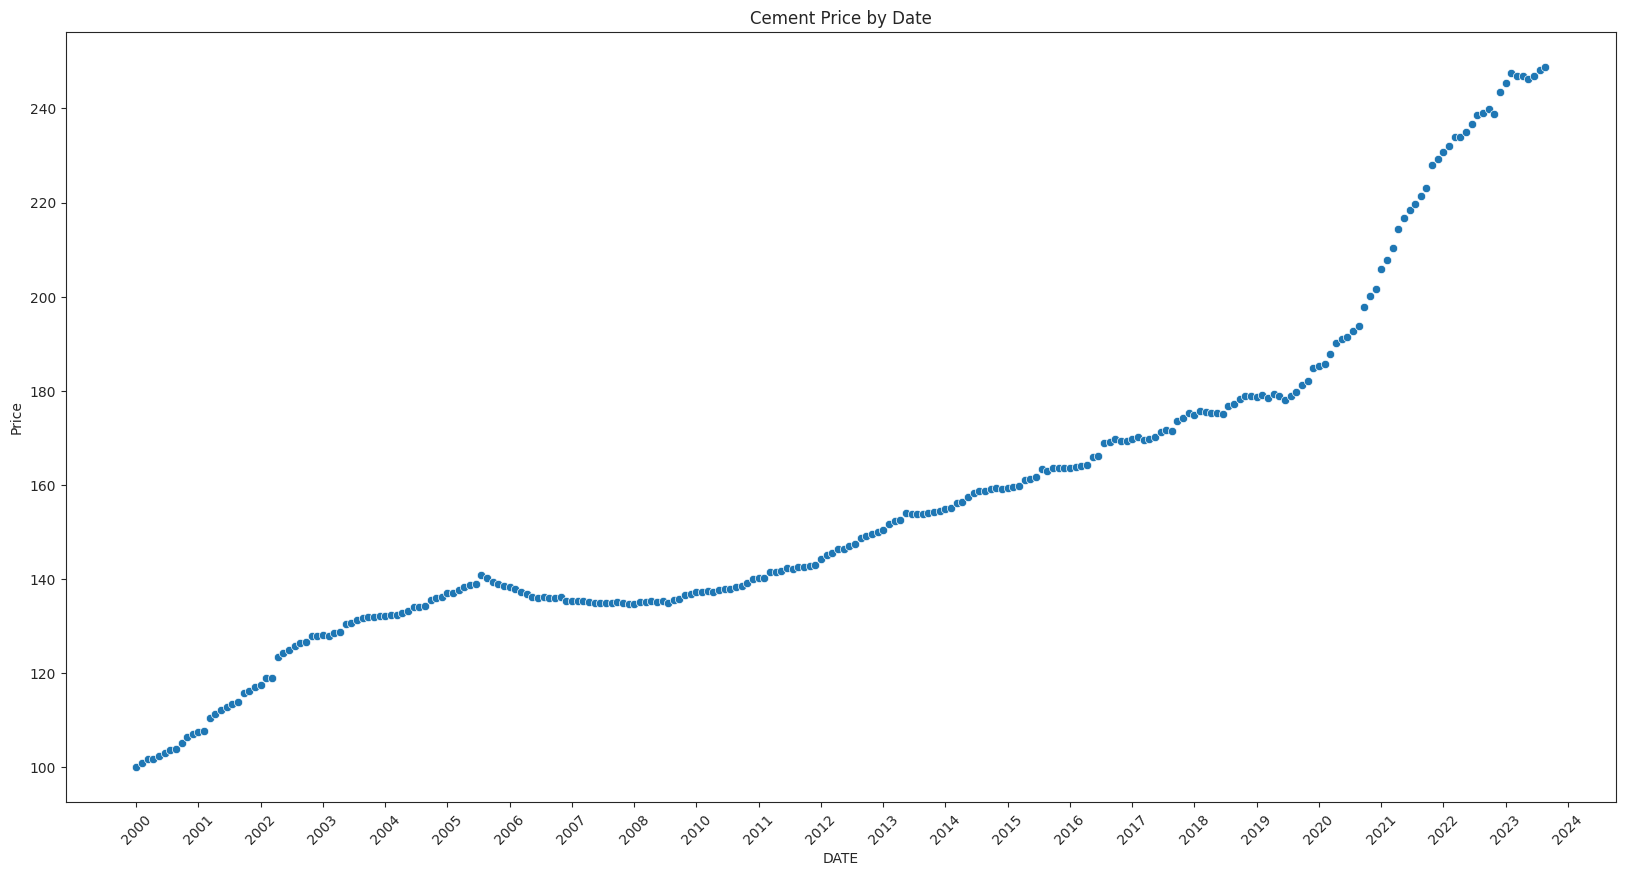

In [145]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45,ticks = [0, 11, 22, 33, 44, 55, 66, 77, 88, 99, 110, 121, 132, 143, 154, 165, 176, 187, 198, 209, 220, 231, 242, 253, 264],
           labels = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])
sns.scatterplot(PPI_Cement, x = PPI_Cement.columns[0], y = PPI_Cement.columns[1])
plt.title('Cement Price by Date')

## PPI-Metals
Metal has the largest ending spike between 2022 and 2024, at least visually. It also has the least data, so a direct comparison can't be made without adjusting the scales or directly comparing values mathematically.

Text(0.5, 1.0, 'Metals Price by Date')

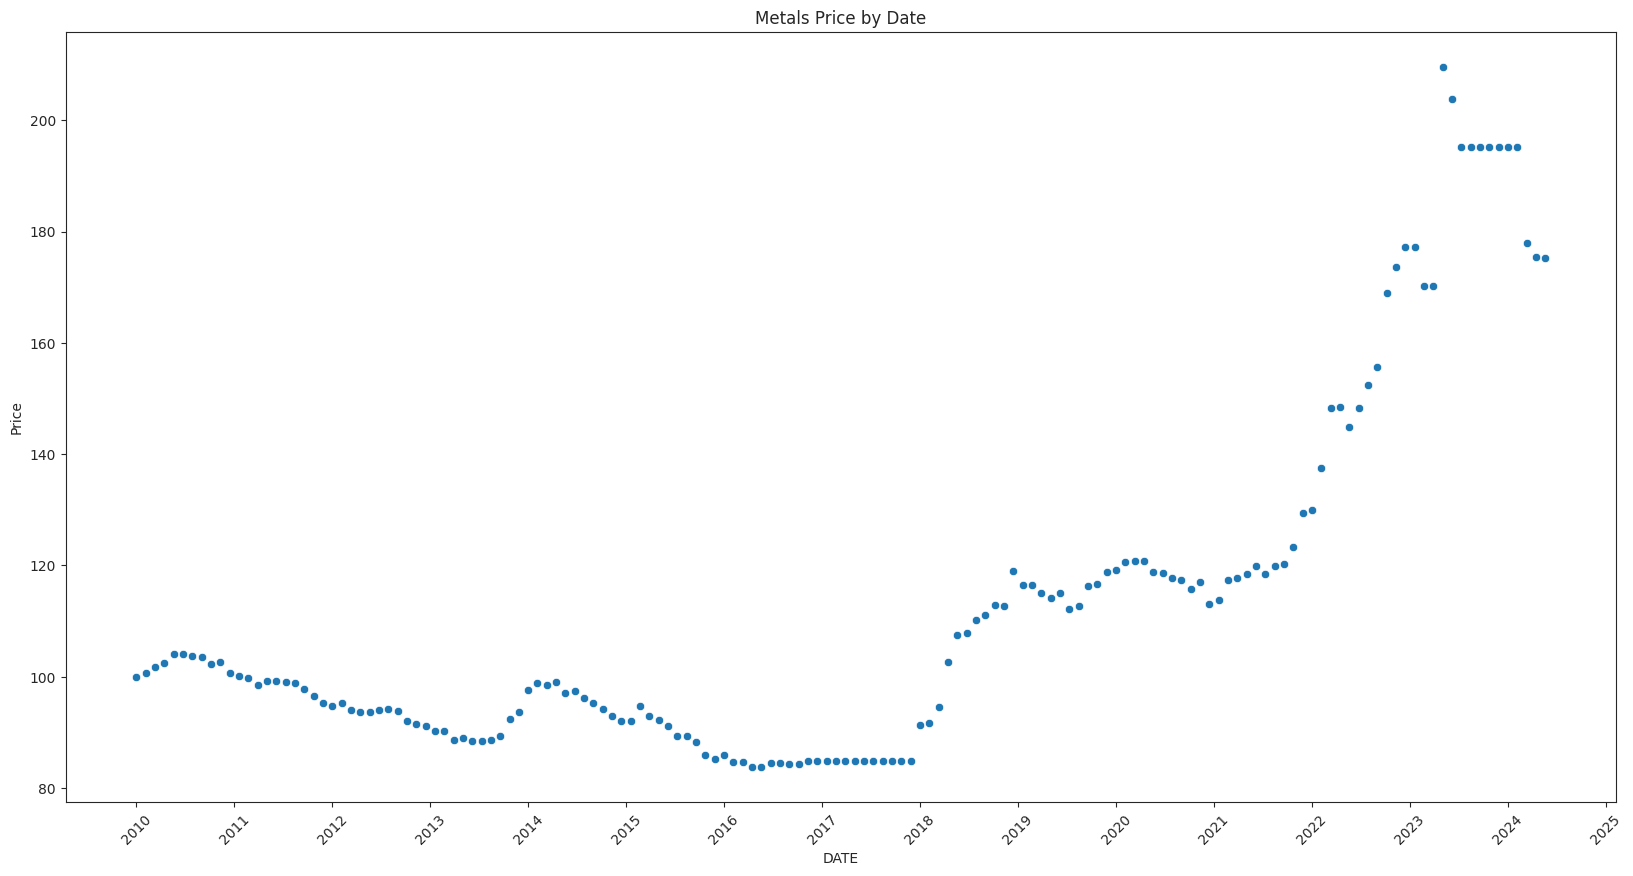

In [150]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45,ticks = [0, 10.5, 21, 31.5, 42, 52.5, 63, 73.5, 84, 94.5, 105, 115.5, 126, 136.5, 147, 157.5],
           labels = ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])
sns.scatterplot(PPI_Metals, x = PPI_Metals.columns[0], y = PPI_Metals.columns[1])
plt.title('Metals Price by Date')

## Inflation Index
A single section has some points jumping higher than others, but it's not so far that I would consider it an outlier. It's a very consistent curve trending upwards since we began recording it.

Text(0.5, 1.0, 'Inflation by Date')

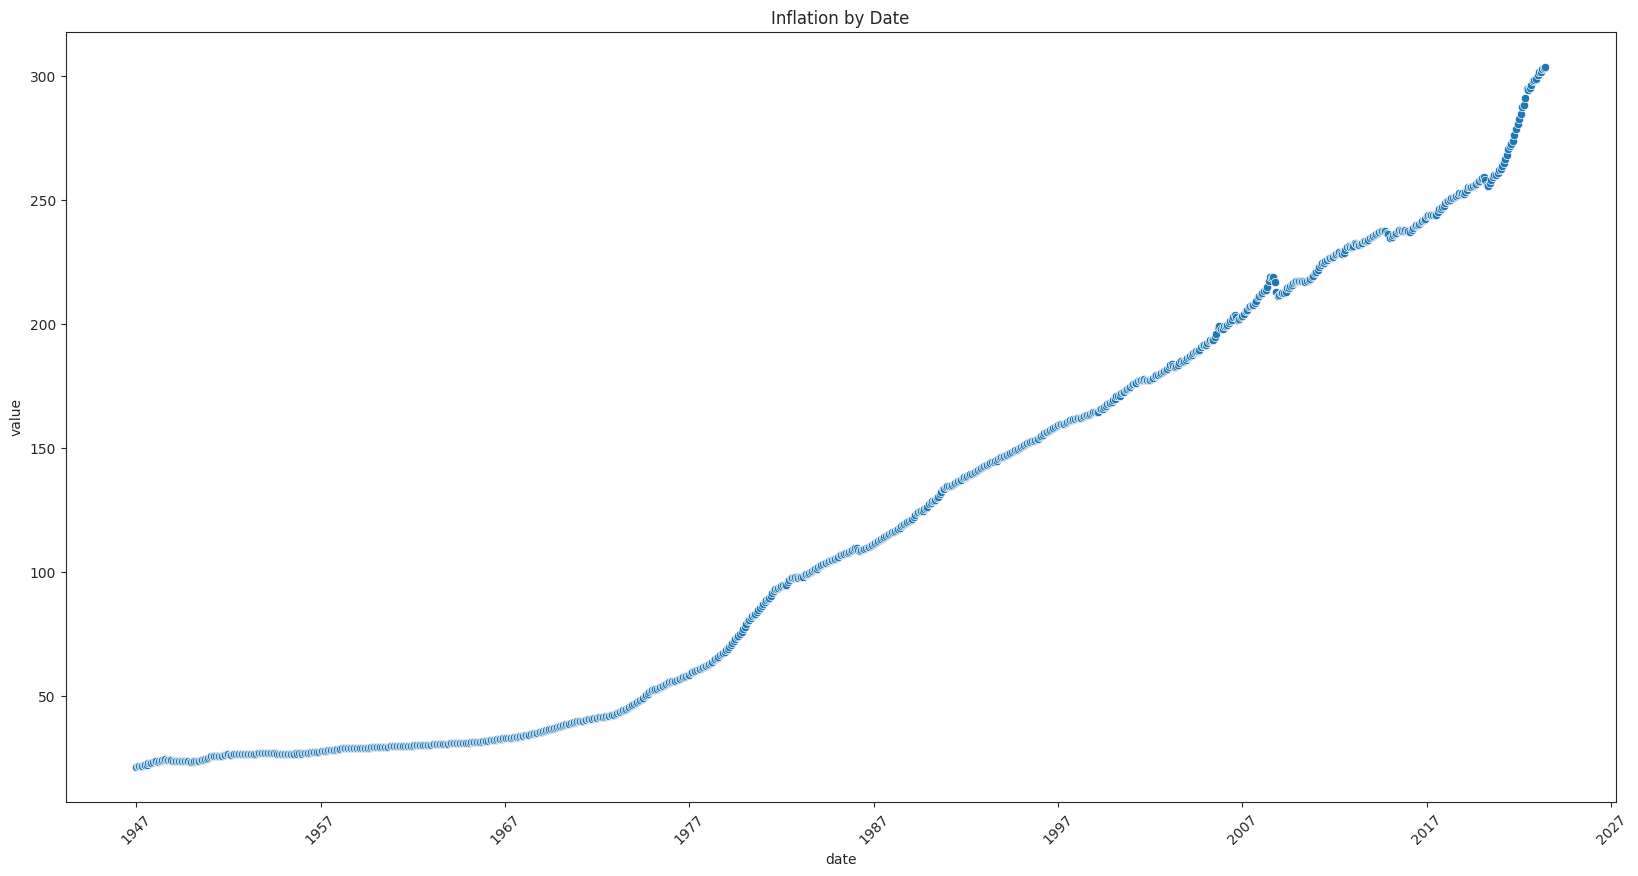

In [152]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45,ticks = [0, 120, 240, 360, 480, 600, 720, 840, 960],
           labels = ["1947", "1957", "1967", "1977", "1987", "1997", "2007", "2017", "2027"])
sns.scatterplot(Inflation, x = Inflation.columns[0], y = Inflation.columns[1])
plt.title('Inflation Index by Date')

## Commercial Real Estate
This data is far less consistent, and shows a massivve dip, but I wouldn't call those outliers, I would call them the 2008 mortgage crisis. Still some decently high variance amongt the rest of the data though.

Text(0.5, 1.0, 'Real Estate Prices by Date')

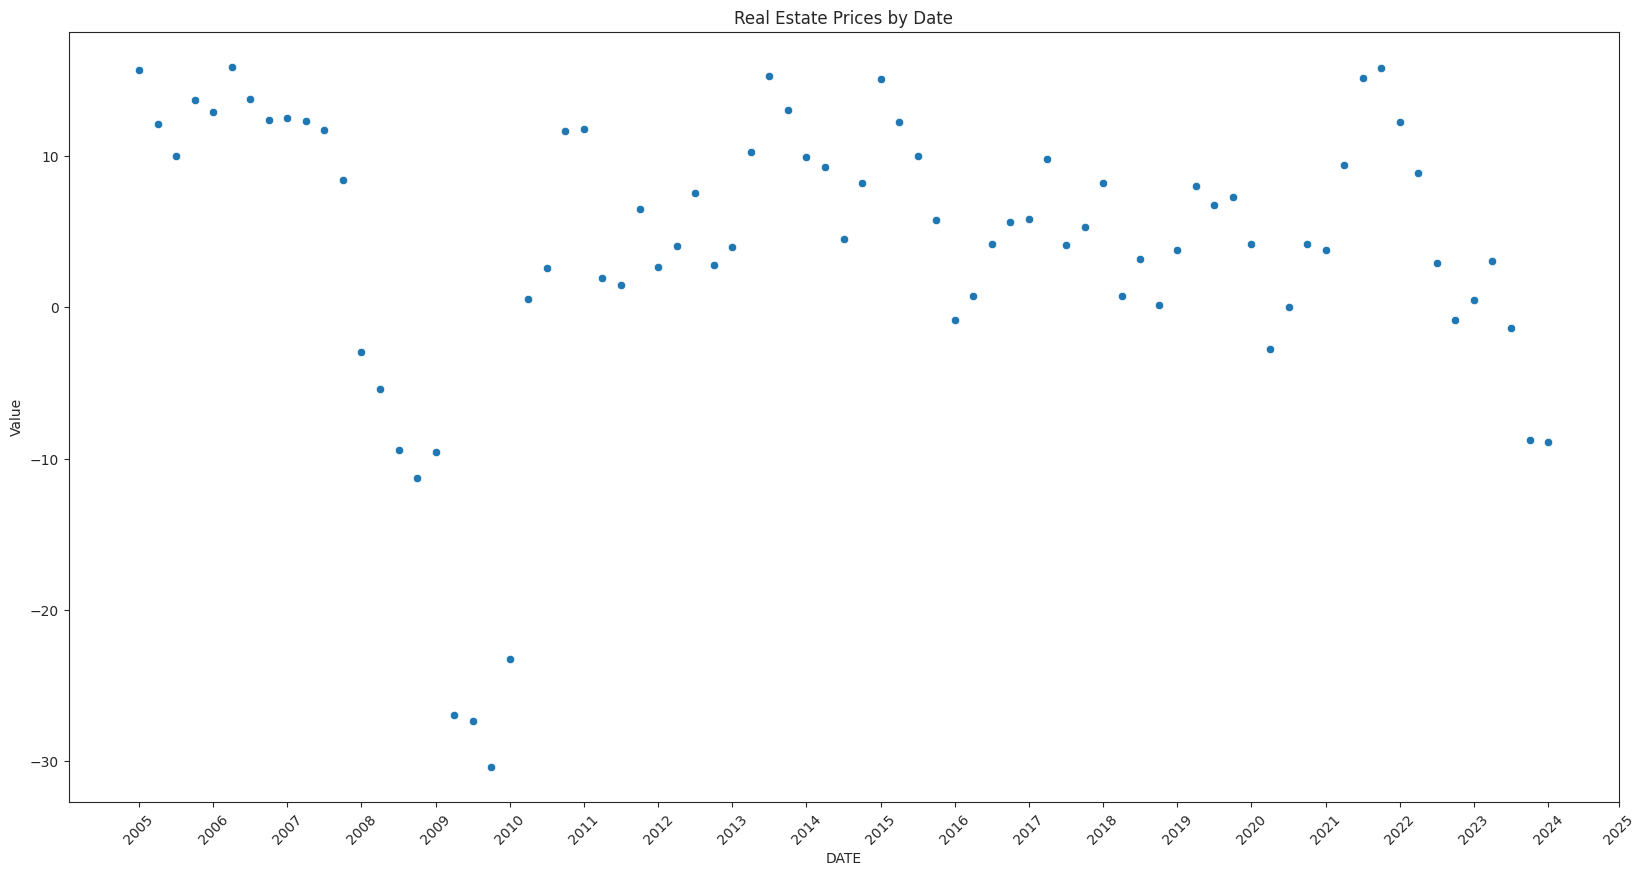

In [171]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45,ticks = [0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 79.8],
           labels = ["2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])
sns.scatterplot(ComRealPri, x = ComRealPri.columns[0], y = ComRealPri.columns[1])
plt.title('Real Estate Prices by Date')

## Sticky Price
Appears mostly normal, jumps around a lot, but no obvious individual outliers.

<Axes: xlabel='DATE', ylabel='Value'>

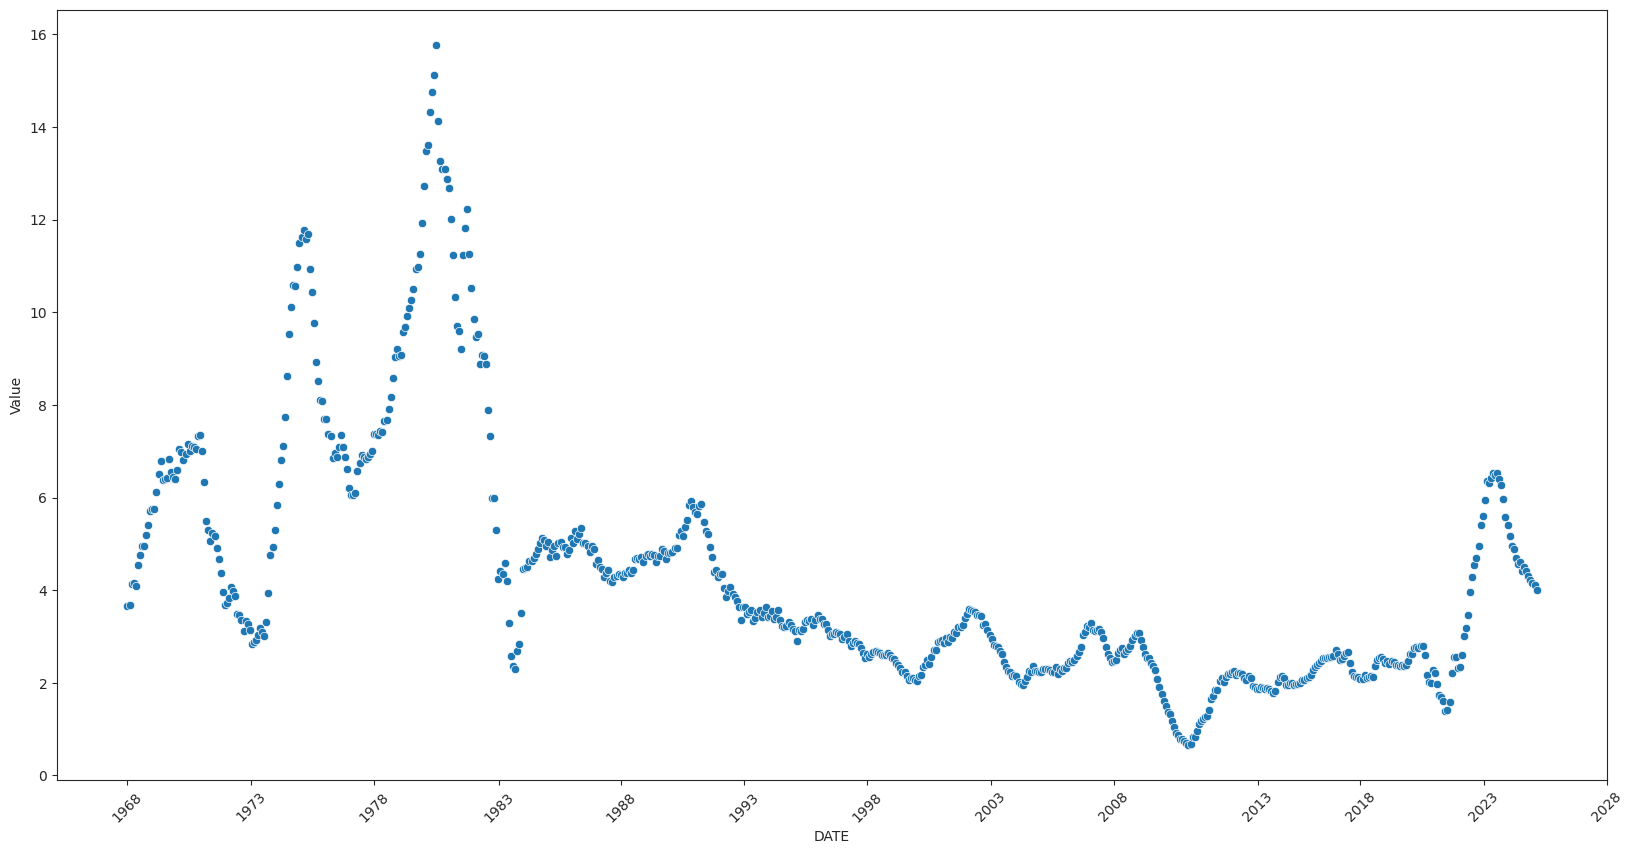

In [183]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45,ticks = [0, 59.5, 119, 179.5, 238, 297.5, 357, 416.5, 476, 545.5, 595, 654.5, 714],
           labels = ["1968", "1973", "1978", "1983", "1988", "1993", "1998", "2003", "2008", "2013", "2018", "2023", "2028"])
sns.scatterplot(StickyPrice, x = StickyPrice.columns[0], y = StickyPrice.columns[1])
plt.title('Sticky Price: Inflation by Date')

## Conclusion
We havve some good data to go through, although we will likely not use sticky price for anything but demonstrating the difference in graphs that are not indexed vs those that are.